### UNIVERSIDAD C0MPLUTENSE DE MADRID (2022-2023)
### Final Master's Project:
## ANALYSIS, FORECAST AND VISUALIZATION  OF ENERGY METRICES AND BALANCES
### Company: MRC
### Authors: GROUP 1 (Antonio, Elejandro, Nam, Ruth, Eduado, Angel)

# I. About the dataset

- We use the dataset **Energy balance matrix** from 1970 to 2021 of Brazil. The dataset is downloaded in the website of 
Olade.

https://sielac.olade.org/

data here: https://github.com/NamNguyen2015/TFM/blob/main/datas/Option_B/Brazil_Energy%20balance%20matrix.xlsx

- The calculations for data processing base on the **Manual Olade 2011**

https://github.com/NamNguyen2015/TFM/blob/main/reference_documents/Manual%20Olade%202011.pdf

### Scope of work:

**a. Background and rationale**
        
Energy matrices are important tools in the field of energy planning and analysis. They provide a comprehensive overview of energy sources, consumption, and related factors within a particular region or system. They serve various purposes, including:
    
    • Allow policy makers to formulate and implement affective measures.
    
    • Help identify energy inefficiencies.
    
    • Play a crucial role in assessing the environmental impact of different energy sources.
    
**b. Approach and methodology**

The objective is to assess the evolution of an energy matrix for a specific country or region over time and develop a mid-term projection. In this context, data analysis plays a crucial role by:

    • Collecting and organizing the data in a structured format, ensuring its quality and consistency. This step is vital to establish a reliable foundation for further analysis.
    
    • Performing exploratory data analysis (EDA) to gain a preliminary understanding of the data. EDA helps uncover patterns, trends, and relationships within the energy matrix dataset. It provides insights into the variables at hand and informs subsequent analytical steps.
   
    • Building indicators to effectively evaluate and analyse the energy matrices. These indicators serve as measurable metrics that reflect specific aspects of the energy system, facilitating meaningful comparisons and assessments.
   
    • Developing a mid-term projection of the energy matrix using suitable machine learning algorithms and econometric techniques. By using historical data, economic and demographic projections, and applying appropriate modelling techniques, it is possible to project future trends in the energy matrix. These projections provide valuable insights into potential changes in energy sources, consumption patterns, and related factors. Decision-makers can utilize this information to formulate effective strategies and policies for the future, aiming for a more sustainable and resilient energy system.
    
    • Constructing visualizations such as Sankey charts and other relevant figures to analyse the energy matrices and present key information.1 Visual representations enhance the comprehension and communication of complex data, enabling stakeholders to grasp trends, interconnections, and potential areas for improvement more easily.


## I.1 Load the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Load the file
import requests
from io import BytesIO
file_path = '../datas/Option_B/Brazil_Energy balance matrix.xlsx'
url="https://github.com/NamNguyen2015/TFM/blob/main/datas/Option_B/Brazil_Energy%20balance%20matrix.xlsx"

#File excel with multi-sheet_names is read as an Dictionary
Dict = pd.read_excel(file_path, sheet_name=None, skiprows=range(4), skipfooter=3)


# Create a new dictionary to store modified dataframes
modified_dict = {}

for k, df in Dict.items():
    # Round the values of each column in the dataframe with 2 decimals
    df = df.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

    # Ignore the first row (unit) in each df
    df = df.iloc[1:]

    # Rename columns in df
    df.rename(columns={'Unnamed: 0': 'SECTOR', 'OTHER PRIMARY_x000d_\n': 'OTHER PRIMARY'}, inplace=True)

    # Remove space in column names and Sector names
    df.columns = df.columns.str.strip()
    df['SECTOR'] = df['SECTOR'].str.strip()

    # Rename in a row
    df['SECTOR'].replace({'COKE PLANTS AND BLAST FURNACES_x000d_': 'COKE PLANTS AND BLAST FURNACES'}, inplace=True)
    
    # fill nule values
    df=df.fillna(np.nan)

    # Convert the keys of Dict to only contain the year
    k_new = k.split(' - ')[0]
    df["YEAR"] = k_new

    # Change all column names to uppercase
    df.columns = df.columns.str.upper()

    # Store the modified dataframe in the new dictionary
    modified_dict[k_new] = df

# Update the original dictionary with the modified dataframes
Dict = modified_dict


print(Dict.keys())

#Save the Clean Dictionary in Excel with multi-sheet_names
file_path='../datas/Option_B/Datas_cleaned/Brazil_Energy balance matrix_cleaned.xlsx'
    
with pd.ExcelWriter(file_path) as writer:
    for k, df in Dict.items():
        df.to_excel(writer, sheet_name=k)



dict_keys(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])


## I.2 Frist visualization of energy balance (Supply-Transformation-Losses-Consumption)

In [3]:
# Concatenate the data
for k in Dict.keys():    
     # Concatenate all DataFrames in Dict vertically
    df_concat = pd.concat(Dict.values(), ignore_index=True)
    df_concat.set_index("YEAR", inplace=True)
    df_concat.index = df_concat.index.astype(int)
    #df_concat.index = pd.to_datetime(df_concat.index, format='%Y')
    
df_concat.head()

SECTOR       OIL  NATURAL GAS     COAL  HYDROENERGY  GEOTHERMAL  \
YEAR                                                                          
1970    PRODUCTION   8161.58      1102.24  1044.43      3421.52         NaN   
1970        IMPORT  17845.05          NaN  1358.47          NaN         NaN   
1970        EXPORT     65.05          NaN      NaN          NaN         NaN   
1970  STOCK CHANGE   -277.33          NaN  -167.52          NaN         NaN   
1970        UNUSED       NaN       922.22      NaN          NaN         NaN   

      NUCLEAR  FIREWOOD  SUGARCANE AND PRODUCTS  OTHER PRIMARY  ...  \
YEAR                                                            ...   
1970      NaN  31851.53                  3600.7         223.24  ...   
1970      NaN       NaN                     NaN            NaN  ...   
1970      NaN       NaN                     NaN            NaN  ...   
1970      NaN       NaN                     NaN            NaN  ...   
1970      NaN       NaN                     NaN            NaN  ...   

      KEROSENE/JET FUEL  DIESEL OIL  FUEL OIL   COKE  CHARCOAL   GASES  \
YEAR                                                                     
1970            1307.21     5674.61   8399.23  55.18   1766.75  465.95   
1970               8.19         NaN       NaN  72.42       NaN     NaN   
1970             122.91       47.15    748.34    NaN       NaN     NaN   
1970             -54.86      -42.01    -69.03 -24.83       NaN     NaN   
1970                NaN         NaN       NaN    NaN       NaN   55.88   

      OTHER SECONDARY  NON-ENERGY  TOTAL SECUNDARIES     TOTAL  
YEAR                                                            
1970           321.73      886.77           31068.07  49405.24  
1970              NaN      368.92             937.48  20141.01  
1970              NaN         NaN             920.12    985.17  
1970            15.41      -53.93            -345.28   -790.13  
1970            50.45         NaN             106.33   1028.54  

[5 rows x 24 columns]

### Show the data summary over years

In [4]:
# Group by Year and SECTOR, and sum the TOTAL values
selected_SECTORS=['TOTAL SUPPLY','TOTAL TRANSFORMATION','LOSSES','FINAL CONSUMPTION']
df_summary=df_concat.copy()

#df_summary=df_summary.apply(lambda column: column.fillna(0))
df_summary=df_summary[df_summary['SECTOR'].isin(selected_SECTORS)]
df_summary = df_summary.groupby(['YEAR','SECTOR'])['TOTAL'].sum().reset_index()
# Pivot the data
df_summary = df_summary.pivot(index='YEAR', columns='SECTOR', values='TOTAL')

# Reorder the columns in df
df_summary = df_summary[selected_SECTORS]

# Display the resultdf_summary
df_summary.head()

SECTOR  TOTAL SUPPLY  TOTAL TRANSFORMATION   LOSSES  FINAL CONSUMPTION
YEAR                                                                  
1970        66742.40              -5422.47   929.20           58834.12
1971        70092.03              -5437.72  1024.93           61691.69
1972        75111.33              -5936.88  1146.03           65995.12
1973        81963.44              -6488.78  1269.21           71692.86
1974        87628.20              -6959.24  1458.78           76198.40

### Visualize the data summary

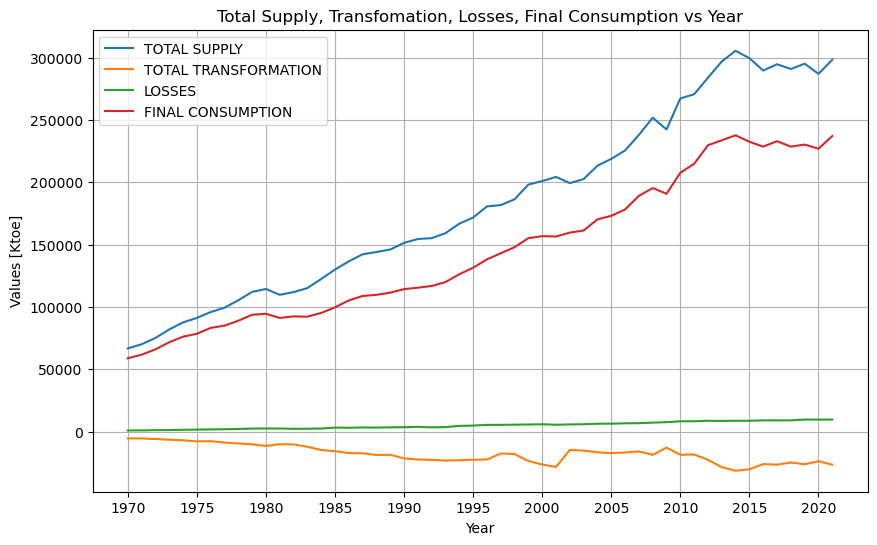

In [5]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=( 10,6))

#for k in selected_SECTORS:
 #   df_k=df_concat.loc[df_concat["SECTOR"]==k].drop(columns=["SECTOR"], axis=1)
  #  sns.lineplot(data=df_k, x=df_k.index, y='TOTAL', label=k, ax=ax)

for col in df_summary.columns:
    sns.lineplot(data=df_summary[col], x=df_summary.index, y=df_summary[col], label=col, ax=ax)
        
# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel(f'Values [Ktoe]')
ax.set_title(f'Total Supply, Transfomation, Losses, Final Consumption vs Year')
ax.set_xticks(df_summary.index.unique()[::5])

# Show the legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()




The negative transformation values over  years typically means that more energy was consumed or transformed within the energy system than was produced or input into the system during that specific time period (year). In other words, it indicates an energy deficit or a situation where the energy demands and transformations within the system exceeded the energy available from primary sources or imports.

## I.3 Sankey Diagram

- Sankey diagrams are valuable tools for visualizing energy flows and understanding energy balances in complex systems. 

- Reviewing Sankey diagrams in an energy balance context is crucial for gaining insights into energy flows, identifying inefficiencies, ensuring a balance between supply and demand, and making informed decisions about energy policy, efficiency improvements, and environmental management. They provide a concise and visually intuitive representation of complex energy data, making it easier for stakeholders to understand and act upon energy-related challenges and opportunities.

In [6]:
from collections import defaultdict
import plotly.graph_objects as go

### Define the Plot function

In [7]:
# Defining the Plot function
def Plot(year,db):
    label=db[year]["label"]
    source=db[year]["source"]
    target=db[year]["target"]
    value=db[year]["value"]
    color_nodes=db[year]["color_nodes"]
    color_links=db[year]["color_links"]
    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 30,
          thickness = 20,
          line = None, # dict(color = "black", width = 0.5),
          label = label,
          color = color_nodes
        ),
        link = dict(
          source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
          target = target,
          value = value,
            color=color_links
      ))])

    fig.update_layout(title_text=year, font_size=10)
    fig.show()

#### Preparation the data to plot

In [8]:
# Preparation the data to plot
def Data_Generate(Dict):
    
    Dict_out = {}  # Initialize the output dictionary
    for sheet_name in Dict.keys():

        df=Dict[sheet_name]
        
         # Reset index
        df=df.set_index('SECTOR')

        # Transpose df
        df=df.T

        # Fill NaN values
        df=df.fillna(np.nan)
        
        #df['PRODUCTION_IMPORT']=df['PRODUCTION']+df['IMPORT']
       
        #print(df.head(5))
        # define the combinations
        Transformers=['REFINERIES', 'POWER PLANTS', 'SELF-PRODUCERS',
               'GAS PLANTS', 'CHARCOAL PLANTS', 'COKE PLANTS AND BLAST FURNACES',
               'DISTILLERIES', 'OTHER CENTERS']
        Primaries=['OIL','NATURAL GAS','COAL','HYDROENERGY','GEOTHERMAL','NUCLEAR','FIREWOOD','SUGARCANE AND PRODUCTS','OTHER PRIMARY']
        Secondaries=['ELECTRICITY','LPG','GASOLINE/ALCOHOL','KEROSENE/JET FUEL','DIESEL OIL','FUEL OIL','COKE','CHARCOAL','GASES','OTHER SECONDARY']
        Consumptions=['TRANSPORT','INDUSTRIAL','RESIDENTIAL','COMMERCIAL, SERVICES, PUBLIC','AGRICULTURE, FISHING AND MINING','CONSTRUCTION AND OTHERS']
        supplies=['PRODUCTION_IMPORT','EXPORT','STOCK CHANGE', 'UNUSED']

        unique_combinations = []

        # here add secondary combination then type of consumption combination
        #for i in supplies:
         #   for j in Primaries+Secondaries:
          #      unique_combinations.append((j, i,abs(df[i][j])))
                
          

        for i in Transformers:
            for j in Primaries:
                unique_combinations.append((j, i,abs(df[i][j])))

        for i in Transformers:
            for j in Secondaries:
                unique_combinations.append((i, j,abs(df[i][j])))

        # the final consumption column - Usage column
        for i in Consumptions:
            for j in Primaries+Secondaries:
                unique_combinations.append((j, i,abs(df[i][j])))
                
        #for i in Primaries+Secondaries:
         #   unique_combinations.append((i, i+'-PRODUCTION_IMPORT',abs(df['PRODUCTION_IMPORT'][i]))) 
                
        label=Transformers+Primaries+Secondaries+Consumptions+Primaries+Secondaries#+[i+'-PRODUCTION_IMPORT' for i in Primaries+Secondaries]

        
        #colors
        color_Transformers=['blue','yellow','green','orange','grey','grey','pink','cyan']
        color_Primaries=['black','orange','darkgray','lightblue','darkred','red','brown','darkgreen','khaki']
        color_Secondaries=['yellow','lightgreen','plum','plum','plum','grey','grey','grey','grey']
        color_Consumptions=['darkmagenta' for i in range(9)]
        color_nodes=color_Transformers+color_Primaries+color_Secondaries+color_Consumptions+color_Primaries+color_Secondaries
        
        # Rename the sheet_name to contain only year. Sample: "1970 - Brazil"--> "1970"
        sheet_name_new = sheet_name.split(' - ')[0]
    
        _dict=Dict_out[sheet_name_new]={}
        _dict["source"]=[]
        _dict["target"]=[]
        _dict["value"]=[]
        _dict["label"]=label
        _dict["color_nodes"]=color_nodes
        _dict["color_links"]=[]
        


        #Dict_out[sheet_name_new] = data  # Store the data in the dictionary
        for k in unique_combinations:
            _dict["source"].append(label.index(k[0]))
            _dict["target"].append(label.index(k[1]))
            _dict["value"].append(k[2])
            _dict["color_links"].append(color_nodes[label.index(k[0])])
    return Dict_out

In [9]:
db=Data_Generate(Dict)

### Sample plot

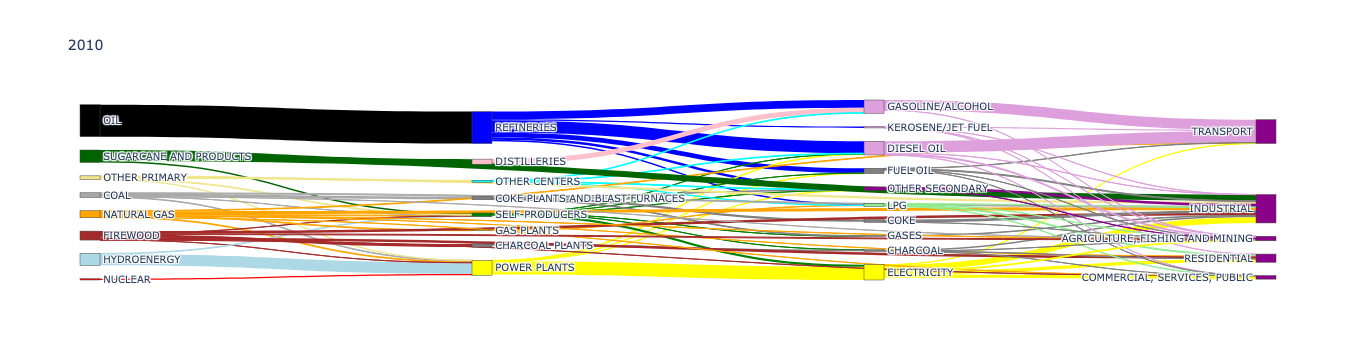

In [10]:
Plot(year='2010',db=db)

## II. DATA ANALYSIS CONSUMPTION



In [11]:
# Show the df final consumption:
df_C=df_concat.copy()

selected_SECTORS_C=['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS',
       'NON-ENERGY CONSUMPTION','FINAL CONSUMPTION']

df_C=df_C[df_C['SECTOR'].isin(selected_SECTORS_C)]
df_C = df_C.groupby(['YEAR','SECTOR'])['TOTAL'].sum().reset_index()
# Pivot the data
df_C = df_C.pivot(index='YEAR', columns='SECTOR', values='TOTAL')

# Reorder the columns in df
df_C = df_C[selected_SECTORS_C]

# Display the resultdf_summary
df_C.head()

SECTOR  TRANSPORT  INDUSTRIAL  RESIDENTIAL  COMMERCIAL, SERVICES, PUBLIC  \
YEAR                                                                       
1970     12661.99    16020.92     22075.66                       1266.80   
1971     13841.87    17454.73     22253.96                       1406.98   
1972     15633.22    19026.99     22440.87                       1570.69   
1973     18328.90    21493.43     22354.13                       1737.84   
1974     20105.68    23257.01     22316.70                       1873.46   

SECTOR  AGRICULTURE, FISHING AND MINING  CONSTRUCTION AND OTHERS  \
YEAR                                                               
1970                            5351.01                     0.00   
1971                            5317.39                     0.00   
1972                            5338.47                     0.00   
1973                            5441.91                     0.00   
1974                            5376.38                     7.15   

SECTOR  NON-ENERGY CONSUMPTION  FINAL CONSUMPTION  
YEAR                                               
1970                   1457.73           58834.12  
1971                   1416.75           61691.69  
1972                   1984.88           65995.12  
1973                   2336.65           71692.86  
1974                   3262.03           76198.40

In [12]:
# df_C_percentages calculate the percentages

df_C_percentages = (df_C.drop(columns=['FINAL CONSUMPTION']).div(df_C['FINAL CONSUMPTION'], axis=0) * 100)
df_C_percentages = df_C_percentages.round(0)

df_C_percentages.columns

Index(['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS', 'NON-ENERGY CONSUMPTION'],
      dtype='object', name='SECTOR')

In [13]:
# Drop the 'FINAL CONSUMPTION' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_C.drop(columns=["FINAL CONSUMPTION"])



### a- Show the line_plot:

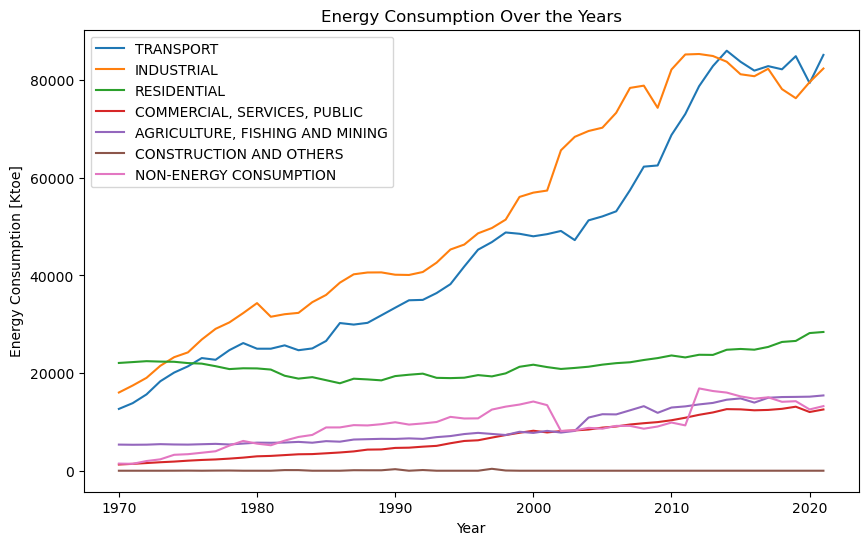

In [14]:
data=df_stackplot.copy()

# Line_Plot:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

data.plot(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption [Ktoe]')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left')

plt.show()

### b- Plot both stack plots side by side

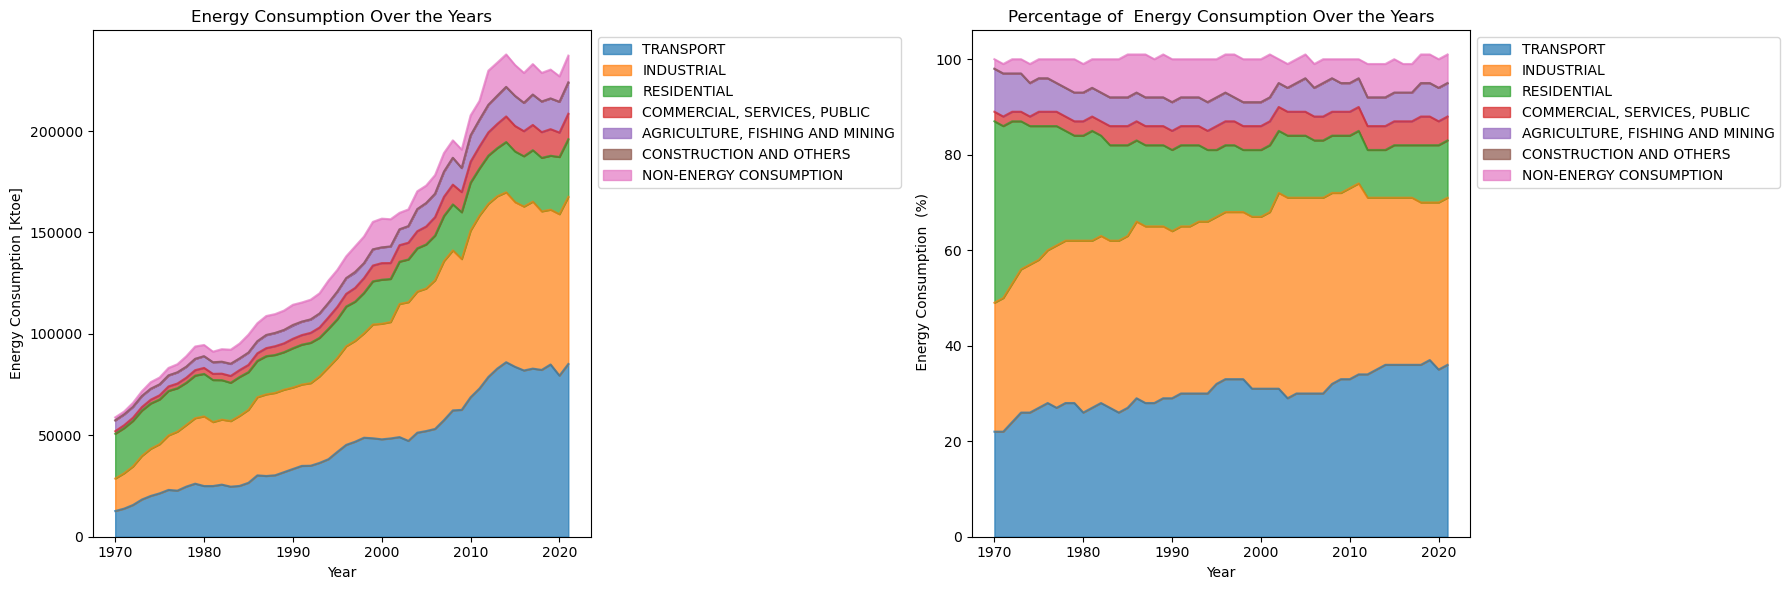

In [15]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 6))

df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption [Ktoe]')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_C_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel(' Energy Consumption  (%)')
ax2.set_title('Percentage of  Energy Consumption Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

### CORRELATION MATRIX

In [16]:
#df_C.index = pd.to_datetime(df_C.index, format='%Y')
df_C.columns

Index(['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS', 'NON-ENERGY CONSUMPTION',
       'FINAL CONSUMPTION'],
      dtype='object', name='SECTOR')

In [17]:

list_corr=df_C.columns.drop(['FINAL CONSUMPTION'])

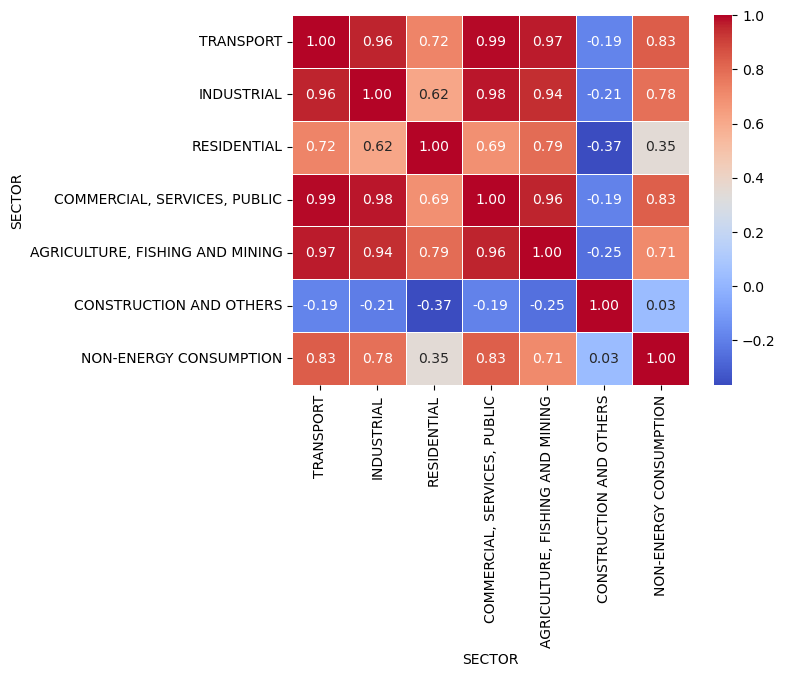

In [18]:

corr_mat = df_C[list_corr].corr()
sns.heatmap(corr_mat,annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.show()

From the correlation matrix, we can observe that the sector **'CONSTRUCTION AND OTHERS'** has a very low correlation with other sectors. We can consider dropping it if necessary.

In [19]:
df_C.columns

Index(['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS', 'NON-ENERGY CONSUMPTION',
       'FINAL CONSUMPTION'],
      dtype='object', name='SECTOR')

## Scaled data

### MinMaxScaler
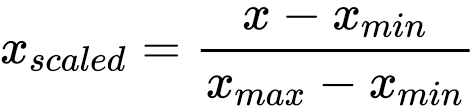

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_C)
scaled_df = pd.DataFrame(scaled_data, columns=df_C.columns)
scaled_df.set_index(df_C.index, inplace=True)

In [21]:
scaled_df.head()

SECTOR  TRANSPORT  INDUSTRIAL  RESIDENTIAL  COMMERCIAL, SERVICES, PUBLIC  \
YEAR                                                                       
1970     0.000000    0.000000     0.395950                      0.000000   
1971     0.016081    0.020678     0.412922                      0.011833   
1972     0.040495    0.043352     0.430713                      0.025652   
1973     0.077235    0.078921     0.422457                      0.039761   
1974     0.101450    0.104355     0.418894                      0.051209   

SECTOR  AGRICULTURE, FISHING AND MINING  CONSTRUCTION AND OTHERS  \
YEAR                                                               
1970                           0.003327                 0.000000   
1971                           0.000000                 0.000000   
1972                           0.002086                 0.000000   
1973                           0.012323                 0.000000   
1974                           0.005838                 0.018204   

SECTOR  NON-ENERGY CONSUMPTION  FINAL CONSUMPTION  
YEAR                                               
1970                  0.002654           0.000000  
1971                  0.000000           0.015970  
1972                  0.036794           0.040021  
1973                  0.059575           0.071865  
1974                  0.119505           0.097046

### ARIMA models for non-stationary time series

We apply the ARIMA model to all sectors, but first, we need to perform some checks to select the best parameters **(p, d, q)**.

In time series analysis, whether we need to scale the data (i.e., standardize or normalize it) depends on the specific characteristics of the data and the modeling techniques we plan to use. Scaling may or may not be required.

In this section, we are focusing on modeling the **univariate** problem.

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score

### Prepare Functions

In [23]:
from sklearn.metrics import mean_absolute_percentage_error 

def MAPE(actual,forecast):
      # Ensure both DataFrames have the same shape
    if actual.shape != forecast.shape:
        raise ValueError("Input data shapes must match.")

    # Replace zero values in y_true with a small non-zero value to avoid division by zero
    actual = actual.replace(0, 1e-10)

    # Calculate the mean of absolute percentage errors 
    mape= round(abs((actual.to_numpy() - forecast.to_numpy()) / actual.to_numpy()).mean()*100,2)

    return mape

In [24]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

In [25]:
# Función para evaluar residuos a través de contrastes de hipótesis
def residcheck(residuals, lags):
    """
    Function to check if the residuals are white noise. Ideally the residuals should be uncorrelated, zero mean, 
    constant variance and normally distributed. First two are must, while last two are good to have. 
    If the first two are not met, we have not fully captured the information from the data for prediction. 
    Consider different model and/or add exogenous variable. 
        
    If Ljung Box test shows p> 0.05, the residuals as a group are white noise. Some lags might still be significant. 
        
    Lags should be min(2*seasonal_period, T/5)
        
    plots from: https://tomaugspurger.github.io/modern-7-timeseries.html
        
    """
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(sm.stats.acorr_ljungbox(x=residuals, lags=lags).lb_pvalue)
    norm_p_val =  stats.jarque_bera(residuals)[1]
    adfuller_p = adfuller(residuals)[1]
        
      
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));
    
    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    #[ax.set_xlim(1.5) for ax in [acf_ax, kde_ax]]
    sns.despine()
    plt.tight_layout();
    plt.show()
    print("** Mean of the residuals: ", np.around(resid_mean,2))
        
    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3), 
        "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")
        
    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3),
        "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")
        
    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3), 
        "(>0.05, Non-stationary)" if (adfuller_p > 0.05) else "(<0.05, Stationary)")
    
    return ts_ax, acf_ax, kde_ax   


####  Find the Best Models by chossing the smallest values of  AIC and BIC

In [26]:
import statsmodels.api as sm
def order_aic_bic(df,d):
    order_aic_bic =[]

    # Loop over p values from 0-4
    for p in range(5):
        # Loop over q values from 0-4
        for q in range(5):

            try:
                # create and fit ARMA(p,q) model
                
                model = ARIMA(df, order=(p, d, q))#,initialization='approximate_diffuse')
                results = model.fit()#maxiter=1000

                # Print order and results
                order_aic_bic.append((p, q, results.aic, results.bic))            
            except:
                print(p, q, None, None)

    # Make DataFrame of model order and AIC/BIC scores
    order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

    # lets sort them by AIC and BIC

    # Sort by AIC
    print("Models sorted by AIC ")
    print("\n")
    print(order_df.sort_values('aic').reset_index(drop=True)[:5])

    # Sort by BIC
    print("Models sorted by BIC ")
    print("\n")
    print(order_df.sort_values('bic').reset_index(drop=True)[:5])

## II.2. Generate for all sectors

### a. Step 1: Manually check to chose d:
In this step, we first check the stationarity of a time series by performing a statistical test, such as the Augmented Dickey-Fuller (ADF) test, and examining the p-value associated with the test. If the p-value is **smaller than 0.05**, we can consider the series as stationary; otherwise, we make the series stationary by applying differencing. The minimum order of differencing is the value of **d**.

Additionally, we plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) at each differencing order. This step allows us to select the appropriate values for 'p' and 'q' based on the characteristics of the ACF and PACF plots.


TRANSPORT-Test the original
Results of Dickey-Fuller Test:
Test Statistic                  1.478493
p-value                         0.997443
#Lags Used                      7.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64
TRANSPORT-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                 -2.756864
p-value                         0.064704
#Lags Used                      6.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64
TRANSPORT-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                 -3.444595
p-value                         0.009529
#Lags Used                      4.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)     

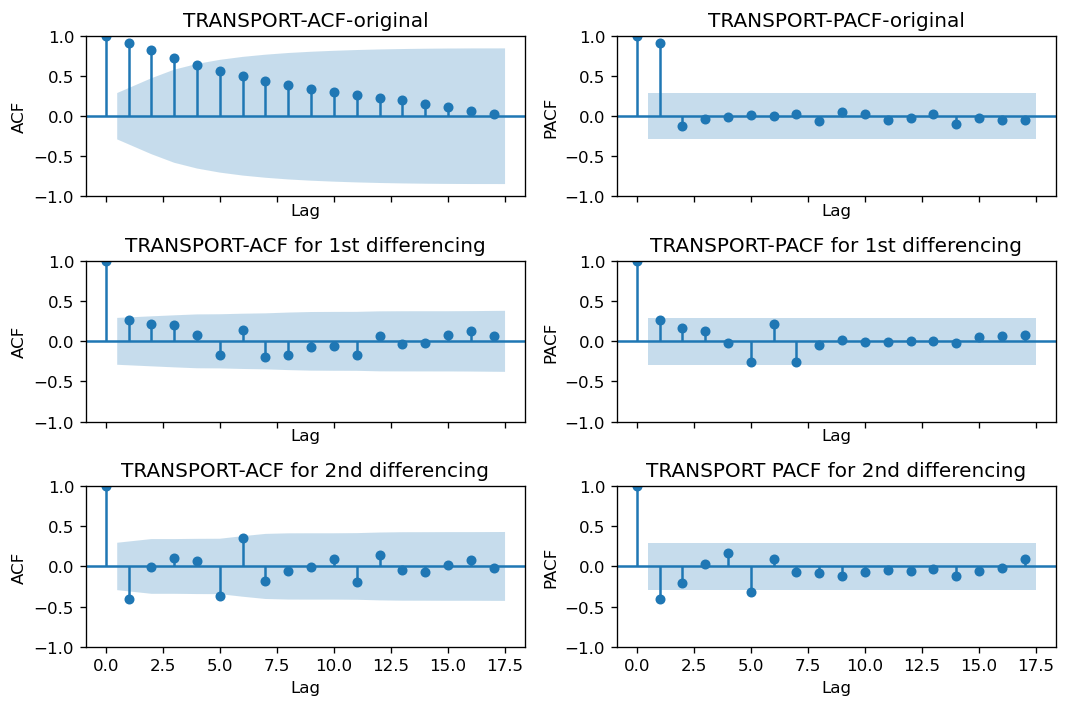

*************************************
INDUSTRIAL-Test the original
Results of Dickey-Fuller Test:
Test Statistic                 -0.449785
p-value                         0.901449
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
INDUSTRIAL-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                 -5.317197
p-value                         0.000005
#Lags Used                      1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64
INDUSTRIAL-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                 -3.912924
p-value                         0.001942
#Lags Used                      6.000000
Number of Observations Used    37.000000
Critical Value (1%)     

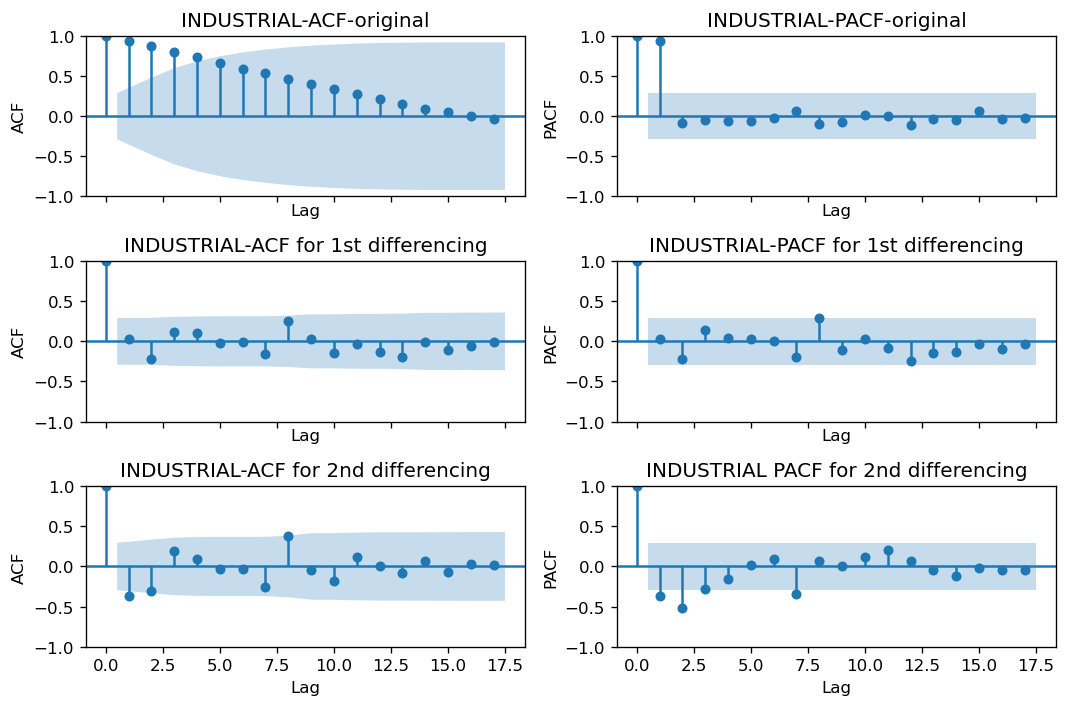

*************************************
RESIDENTIAL-Test the original
Results of Dickey-Fuller Test:
Test Statistic                  0.213308
p-value                         0.972998
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
RESIDENTIAL-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                 -5.425666
p-value                         0.000003
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64
RESIDENTIAL-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                -7.081189e+00
p-value                        4.661825e-10
#Lags Used                     2.000000e+00
Number of Observations Used    4.100000e+01
Critical 

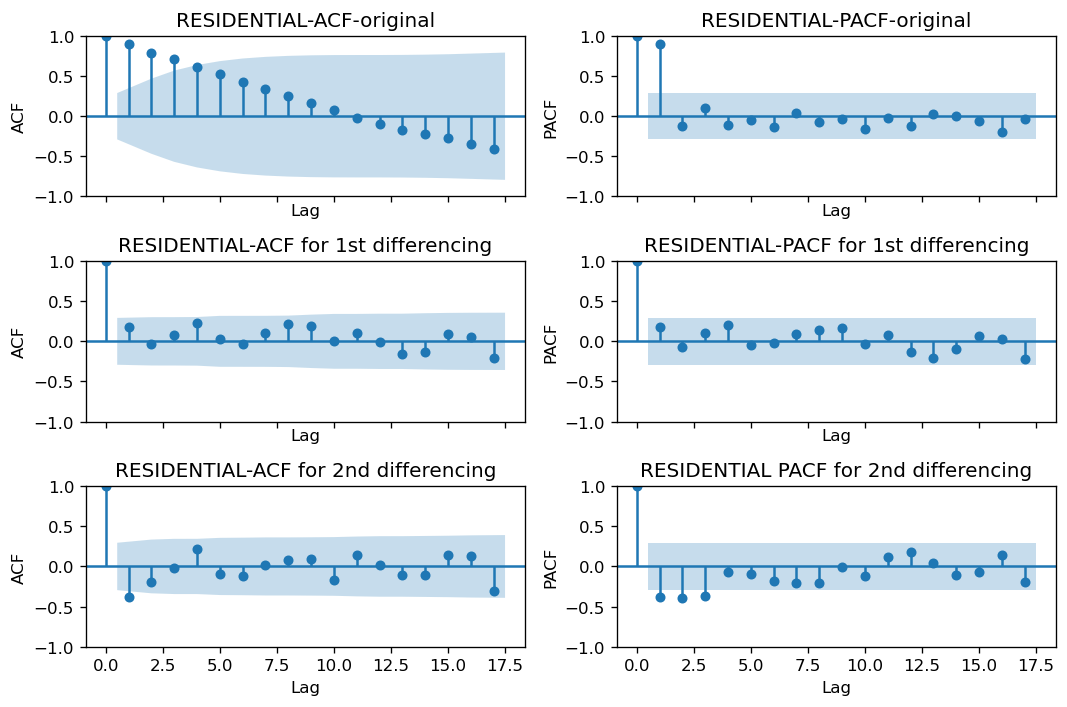

*************************************
COMMERCIAL, SERVICES, PUBLIC-Test the original
Results of Dickey-Fuller Test:
Test Statistic                  2.752582
p-value                         1.000000
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
COMMERCIAL, SERVICES, PUBLIC-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                 -5.187659
p-value                         0.000009
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64
COMMERCIAL, SERVICES, PUBLIC-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                 -5.083537
p-value                         0.000015
#Lags Used                      3.000000
Number of O

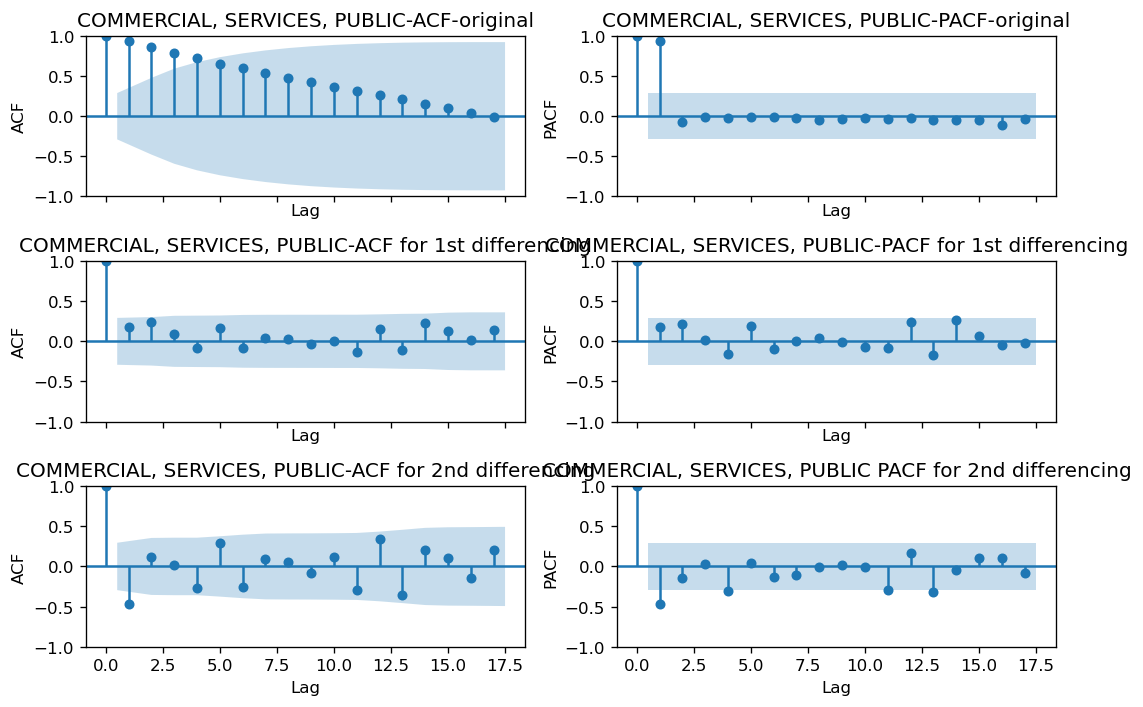

*************************************
AGRICULTURE, FISHING AND MINING-Test the original
Results of Dickey-Fuller Test:
Test Statistic                  1.209344
p-value                         0.996050
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
AGRICULTURE, FISHING AND MINING-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                -6.949322e+00
p-value                        9.785090e-10
#Lags Used                     0.000000e+00
Number of Observations Used    4.400000e+01
Critical Value (1%)           -3.588573e+00
Critical Value (5%)           -2.929886e+00
Critical Value (10%)          -2.603185e+00
dtype: float64
AGRICULTURE, FISHING AND MINING-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                -6.809117e+00
p-value                        2.138701e-09
#Lags Used      

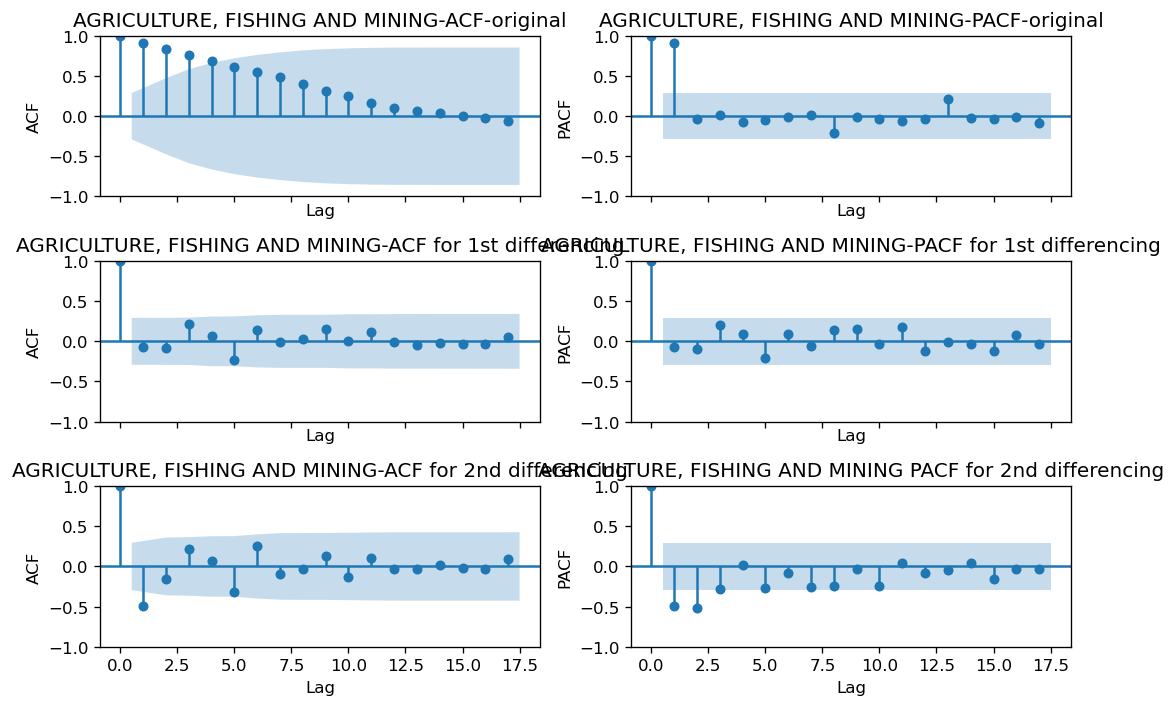

*************************************
CONSTRUCTION AND OTHERS-Test the original
Results of Dickey-Fuller Test:
Test Statistic                -5.910863e+00
p-value                        2.640907e-07
#Lags Used                     0.000000e+00
Number of Observations Used    4.500000e+01
Critical Value (1%)           -3.584829e+00
Critical Value (5%)           -2.928299e+00
Critical Value (10%)          -2.602344e+00
dtype: float64
CONSTRUCTION AND OTHERS-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                -5.843043e+00
p-value                        3.738493e-07
#Lags Used                     5.000000e+00
Number of Observations Used    3.900000e+01
Critical Value (1%)           -3.610400e+00
Critical Value (5%)           -2.939109e+00
Critical Value (10%)          -2.608063e+00
dtype: float64
CONSTRUCTION AND OTHERS-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                 -5.001523
p-value                         0.000022
#Lags Used               

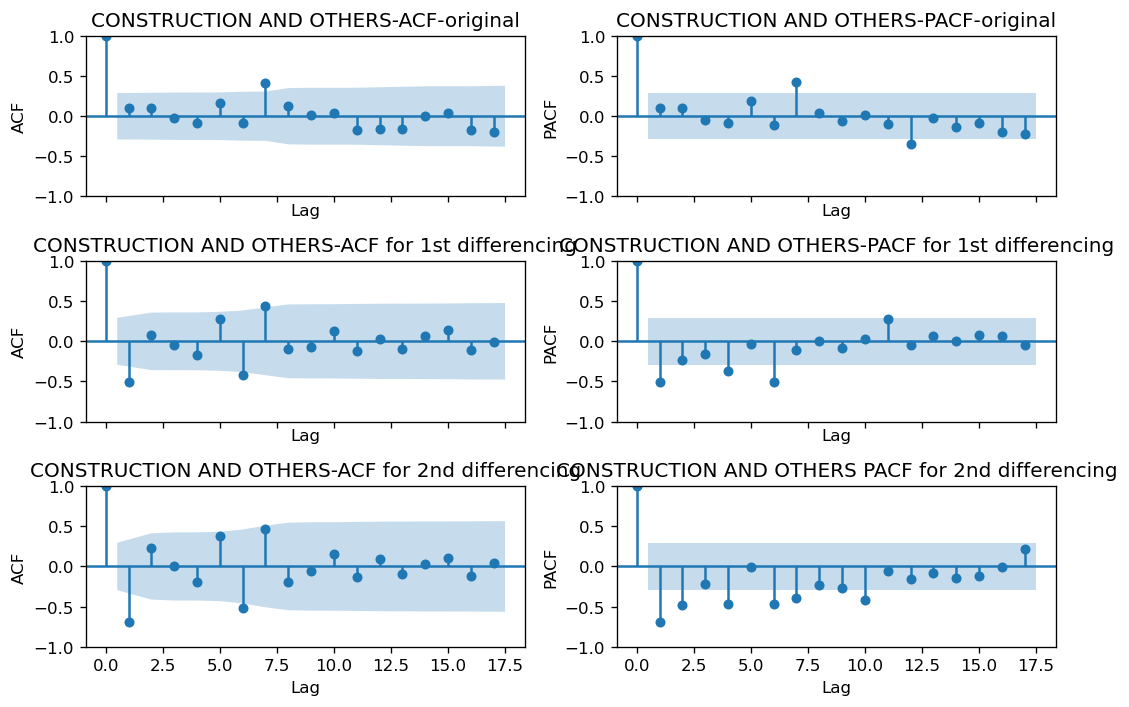

*************************************
NON-ENERGY CONSUMPTION-Test the original
Results of Dickey-Fuller Test:
Test Statistic                 -2.195579
p-value                         0.207854
#Lags Used                     10.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64
NON-ENERGY CONSUMPTION-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                 -2.172822
p-value                         0.216257
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64
NON-ENERGY CONSUMPTION-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                 -2.724450
p-value                         0.069902
#Lags Used                      9.000000
Number of Observations Used  

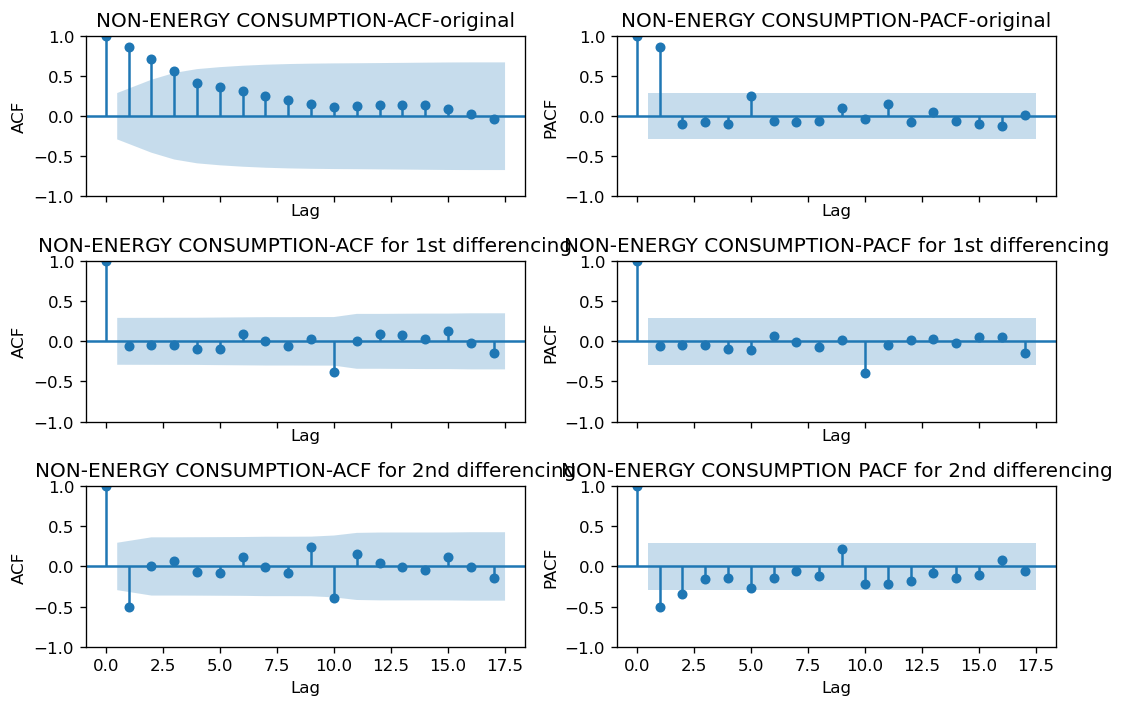

*************************************
FINAL CONSUMPTION-Test the original
Results of Dickey-Fuller Test:
Test Statistic                  3.446750
p-value                         1.000000
#Lags Used                      9.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64
FINAL CONSUMPTION-Test the 1st
Results of Dickey-Fuller Test:
Test Statistic                 -1.457273
p-value                         0.554532
#Lags Used                      8.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64
FINAL CONSUMPTION-Test the 2nd
Results of Dickey-Fuller Test:
Test Statistic                 -4.365760
p-value                         0.000341
#Lags Used                      6.000000
Number of Observations Used    37.000000
Cri

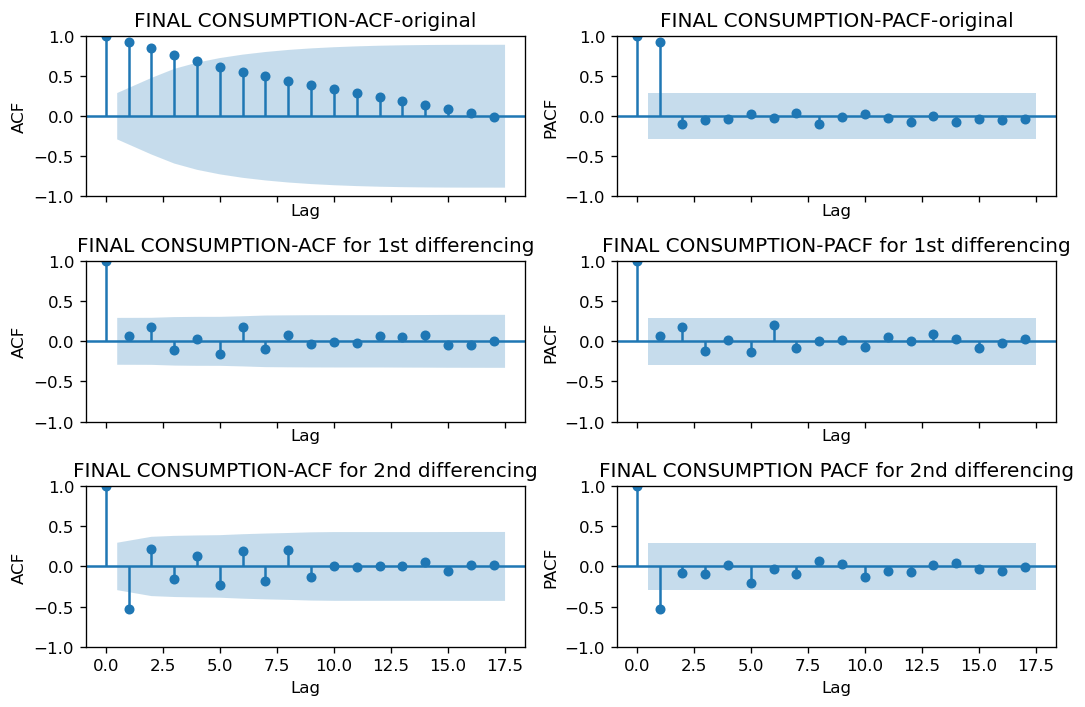

*************************************


In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for s in scaled_df.columns:
    # Separate data (data used: scaled_df)
    
    train_size=int(len(df_C) * 0.90)
    df_tr=df_C[s].iloc[:train_size]#train[['TRANSPORT']]
    df_val=df_C[s].iloc[train_size:]
    
    # test stationary for the original data:
    print(f'{s}-Test the original')
    test_stationarity(df_tr)
    
    # Differencing 1st:
    train_diff = df_tr.diff().dropna()
    # Test stationary
    print(f'{s}-Test the 1st')
    test_stationarity(train_diff)
    # Differencing 2nd:
    train_diff_2=df_tr.diff().diff().dropna()
    # Test starionary
    print(f'{s}-Test the 2nd')
    test_stationarity(train_diff_2)
    
    plt.rcParams.update({'figure.figsize': (9, 6), 'figure.dpi': 120})

    fig, axes = plt.subplots(3, 2, sharex=True)

    # Plot ACF for original data
    plot_acf(df_tr, ax=axes[0, 0])
    axes[0, 0].set_title(f'{s}-ACF-original')
    axes[0, 0].set_xlabel('Lag')
    axes[0, 0].set_ylabel('ACF')

    # Plot PACF for train
    plot_pacf(df_tr, ax=axes[0, 1], method='ywm')
    axes[0, 1].set_title(f'{s}-PACF-original')
    axes[0, 1].set_xlabel('Lag')
    axes[0, 1].set_ylabel('PACF')


    # Plot ACF for train_diff
    plot_acf(train_diff, ax=axes[1, 0])
    axes[1, 0].set_title(f'{s}-ACF for 1st differencing')
    axes[1, 0].set_xlabel('Lag')
    axes[1, 0].set_ylabel('ACF')

    # Plot PACF for train_diff
    plot_pacf(train_diff, ax=axes[1, 1], method='ywm')
    axes[1, 1].set_title(f'{s}-PACF for 1st differencing')
    axes[1, 1].set_xlabel('Lag')
    axes[1, 1].set_ylabel('PACF')

    # Plot ACF for train_diff_2
    plot_acf(train_diff_2, ax=axes[2, 0])
    axes[2, 0].set_title(f'{s}-ACF for 2nd differencing')
    axes[2, 0].set_xlabel('Lag')
    axes[2, 0].set_ylabel('ACF')

    # Plot PACF for train_diff_2
    plot_pacf(train_diff_2, ax=axes[2, 1], method='ywm')
    axes[2, 1].set_title(f'{s} PACF for 2nd differencing')
    axes[2, 1].set_xlabel('Lag')
    axes[2, 1].set_ylabel('PACF')

    plt.tight_layout()
    plt.show()
    
    
    print(f'*************************************')

### b. Step 2: Find the best (p,q) manually
This step is optional, as **p** and **q** can also be selected by finding the minimum values of AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) if **d** is already determined.

In [28]:
import statsmodels.api as sm
def order_aic_bic(df,d):
    order_aic_bic =[]

    # Loop over p values from 0-4
    for p in range(5):
        # Loop over q values from 0-4
        for q in range(5):

            try:
                # create and fit ARMA(p,q) model
                
                model = ARIMA(df, order=(p, d, q))#,initialization='approximate_diffuse')
                results = model.fit()#maxiter=1000

                # Print order and results
                order_aic_bic.append((p, q, results.aic, results.bic))            
            except:
                print(p, q, None, None)

    # Make DataFrame of model order and AIC/BIC scores
    order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

    # lets sort them by AIC and BIC

    # Sort by AIC
    print("Models sorted by AIC ")
    #print("\n")
    print(order_df.sort_values('aic').reset_index(drop=True)[:5])

    # Sort by BIC
    print("Models sorted by BIC ")
    #print("\n")
    print(order_df.sort_values('bic').reset_index(drop=True)[:5])

### Sample check for all sectors

In [58]:
import warnings

# Suppress specific warning by category (e.g., FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [59]:

for s in scaled_df.columns:
    
    # prepare data:
    # Separate size of data   
    train_size=int(len(df_C) * 0.9) 
    df_sector= df_C[[s]]
    #df_sector.index = pd.to_datetime(df_sector.index, format='%Y')
    # Convert index to datetime format
    df_sector.index = pd.to_datetime(df_sector.index, format='%Y')
    
    # Set the frequency to 'AS' (Annual Start)
    df_sector = df_sector.asfreq('AS')
    # Train and Validate
    df_tr=df_sector.iloc[:train_size]
    df_val=df_sector.iloc[train_size:]
       
    if s=='TRANSPORT':
        print(s)
        d=2
        order_aic_bic(df_tr,d)
        print('****************')
           
        
    if s=='INDUSTRIAL':
        print(s)
        d=1
        order_aic_bic(df_tr,d)
        print('****************')
        
    if s=='RESIDENTIAL':
        print(s)
        d=2
        order_aic_bic(df_tr,d)
        print('****************')
        
    if s=='COMMERCIAL, SERVICES, PUBLIC':
        print(s)
        d=1
        order_aic_bic(df_tr,d)
        print('****************')
         
    if s=='AGRICULTURE, FISHING AND MINING':
        print(s)
        d=1
        order_aic_bic(df_tr,d)
        print('****************')
       
    if s=='CONSTRUCTION AND OTHERS':
        print(s)
        d=0
        order_aic_bic(df_tr,d)
        print('****************')
        
    if s=='NON-ENERGY CONSUMPTION':
        print(s)
        d=2
        order_aic_bic(df_tr,d)
        print('****************')
        
    if s=='FINAL CONSUMPTION':
        print(s)
        d=2
        order_aic_bic(df_tr,d)

      

TRANSPORT


/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/s

Models sorted by AIC 
   p  q         aic         bic
0  2  3  796.206082  806.911219
1  3  2  796.585254  807.290392
2  3  3  796.681915  809.171242
3  0  1  796.811392  800.379771
4  1  1  796.815038  802.167607
Models sorted by BIC 
   p  q         aic         bic
0  0  1  796.811392  800.379771
1  1  1  796.815038  802.167607
2  0  2  798.078455  803.431024
3  2  0  798.372588  803.725157
4  1  0  801.167114  804.735493
****************
INDUSTRIAL


/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/o

Models sorted by AIC 
   p  q         aic         bic
0  1  1  829.228416  834.648404
1  1  2  831.143799  838.370449
2  2  1  831.181217  838.407867
3  1  3  831.605846  840.639158
4  3  1  832.201195  841.234507
Models sorted by BIC 
   p  q         aic         bic
0  1  1  829.228416  834.648404
1  1  2  831.143799  838.370449
2  2  1  831.181217  838.407867
3  1  0  836.842583  840.455908
4  1  3  831.605846  840.639158
****************
RESIDENTIAL


/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages

Models sorted by AIC 
   p  q         aic         bic
0  0  1  697.767821  701.336200
1  4  2  697.837150  710.326478
2  1  0  698.514693  702.083072
3  0  2  698.712381  704.064950
4  1  1  698.774452  704.127021
Models sorted by BIC 
   p  q         aic         bic
0  0  0  699.059345  700.843534
1  0  1  697.767821  701.336200
2  1  0  698.514693  702.083072
3  0  2  698.712381  704.064950
4  1  1  698.774452  704.127021
****************
COMMERCIAL, SERVICES, PUBLIC


/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/s

Models sorted by AIC 
   p  q         aic         bic
0  1  1  607.062411  612.482398
1  1  3  608.794535  617.827847
2  3  4  608.823274  623.276574
3  1  4  608.967725  619.807700
4  2  1  609.001057  616.227706
Models sorted by BIC 
   p  q         aic         bic
0  1  1  607.062411  612.482398
1  2  0  610.742267  616.162254
2  2  1  609.001057  616.227706
3  1  2  609.020862  616.247512
4  1  3  608.794535  617.827847
****************
AGRICULTURE, FISHING AND MINING


/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/U

Models sorted by AIC 
   p  q         aic         bic
0  1  1  701.747528  707.167515
1  0  0  702.268438  704.075100
2  4  3  702.956477  717.409777
3  1  2  703.186102  710.412752
4  2  1  703.331584  710.558234
Models sorted by BIC 
   p  q         aic         bic
0  0  0  702.268438  704.075100
1  1  1  701.747528  707.167515
2  1  0  704.074115  707.687440
3  0  1  704.083740  707.697065
4  1  2  703.186102  710.412752
****************
CONSTRUCTION AND OTHERS


/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/U

Models sorted by AIC 
   p  q         aic         bic
0  0  0  536.562178  540.219461
1  3  3  537.776625  552.405756
2  1  0  538.077132  543.563056
3  0  1  538.160202  543.646126
4  2  3  538.502206  551.302696
Models sorted by BIC 
   p  q         aic         bic
0  0  0  536.562178  540.219461
1  1  0  538.077132  543.563056
2  0  1  538.160202  543.646126
3  0  2  539.463140  546.777706
4  2  0  539.648564  546.963130
****************
NON-ENERGY CONSUMPTION


/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/s

Models sorted by AIC 
   p  q         aic         bic
0  0  1  775.490450  779.058830
1  0  2  777.392516  782.745085
2  1  1  777.399338  782.751907
3  1  2  778.722942  785.859700
4  0  3  779.327683  786.464442
Models sorted by BIC 
   p  q         aic         bic
0  0  1  775.490450  779.058830
1  0  2  777.392516  782.745085
2  1  1  777.399338  782.751907
3  1  2  778.722942  785.859700
4  0  3  779.327683  786.464442
****************
FINAL CONSUMPTION


/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting

Models sorted by AIC 
   p  q         aic         bic
0  2  2  874.078236  882.999184
1  1  1  875.607623  880.960192
2  3  2  875.783082  886.488220
3  2  3  876.399412  887.104550
4  4  4  876.533115  892.590821
Models sorted by BIC 
   p  q         aic         bic
0  1  1  875.607623  880.960192
1  0  1  878.235121  881.803500
2  2  2  874.078236  882.999184
3  0  2  878.271687  883.624256
4  1  0  880.879054  884.447433


/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



### c. Generate the model and predict

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



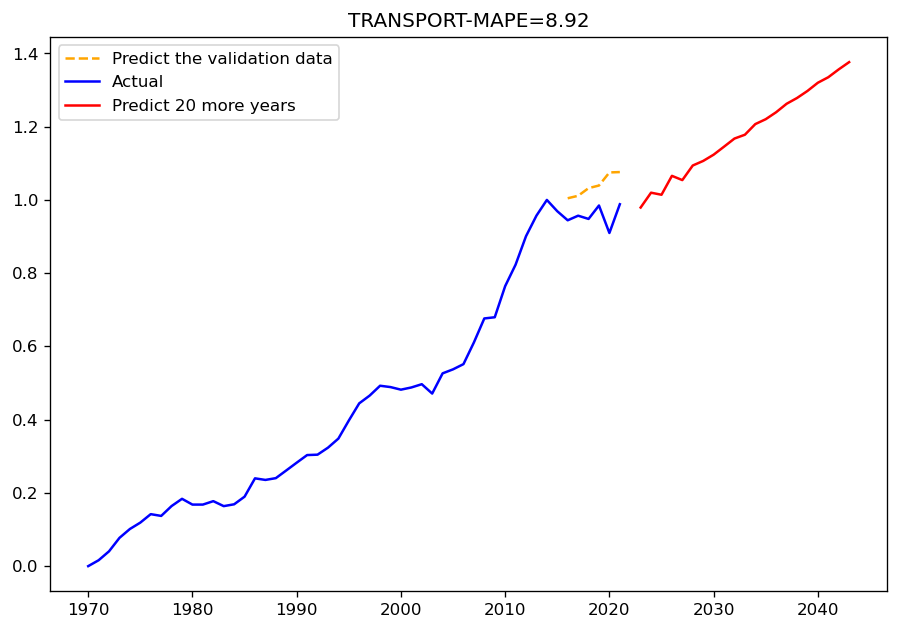

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



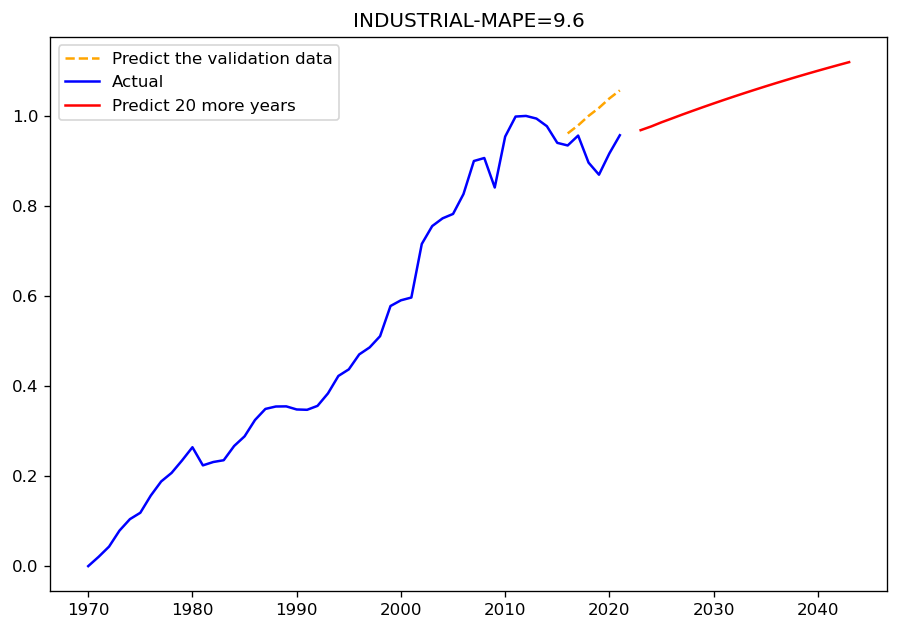

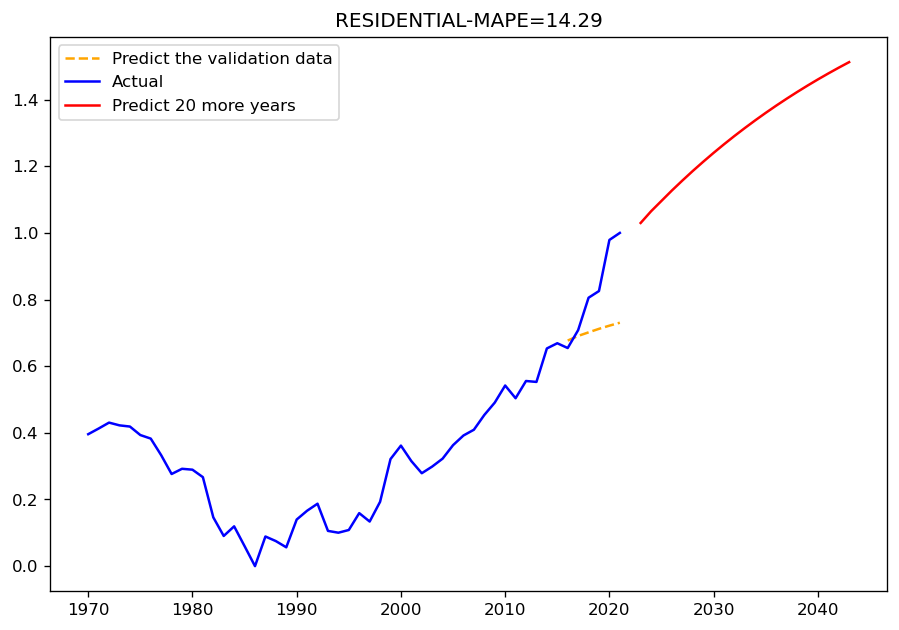

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



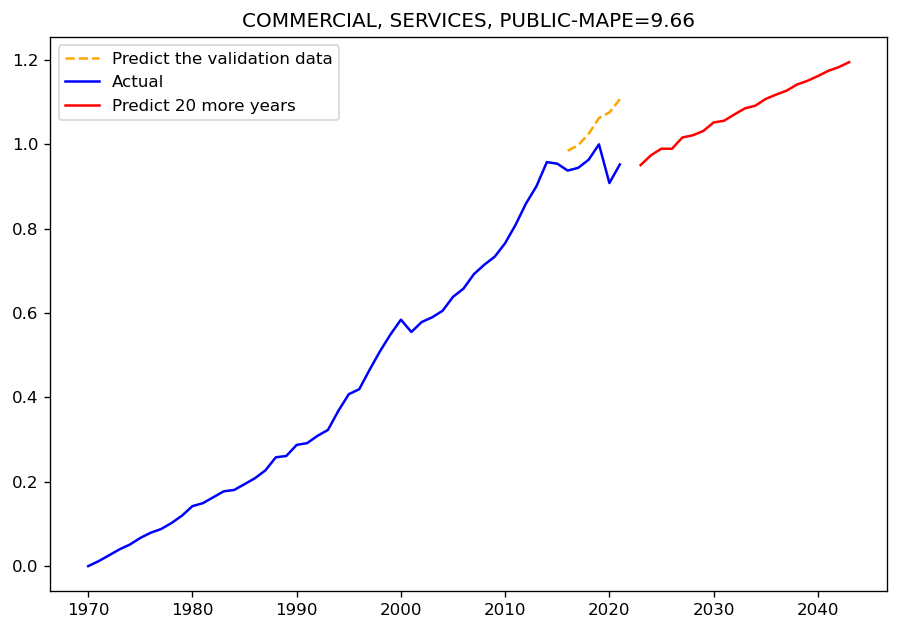

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



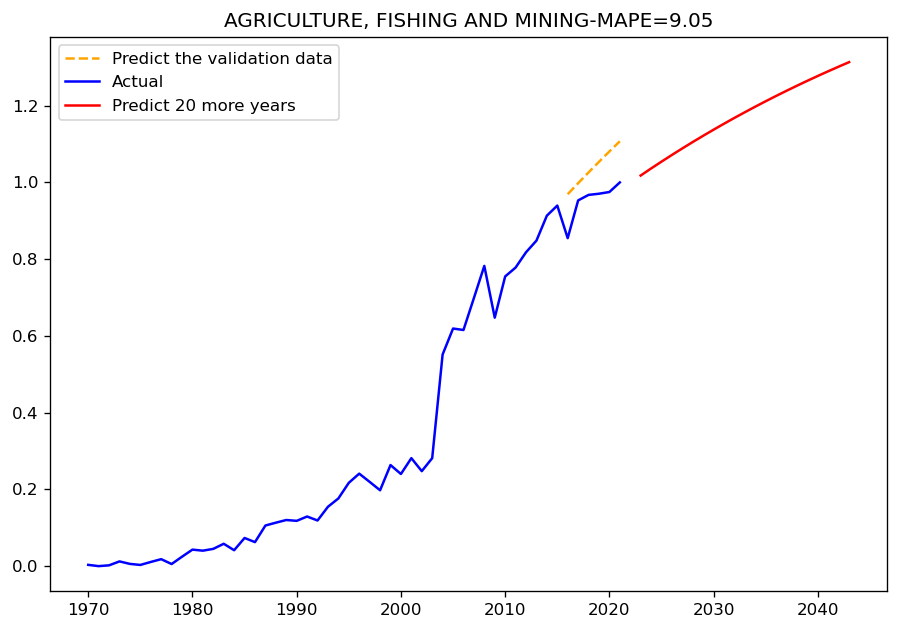

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



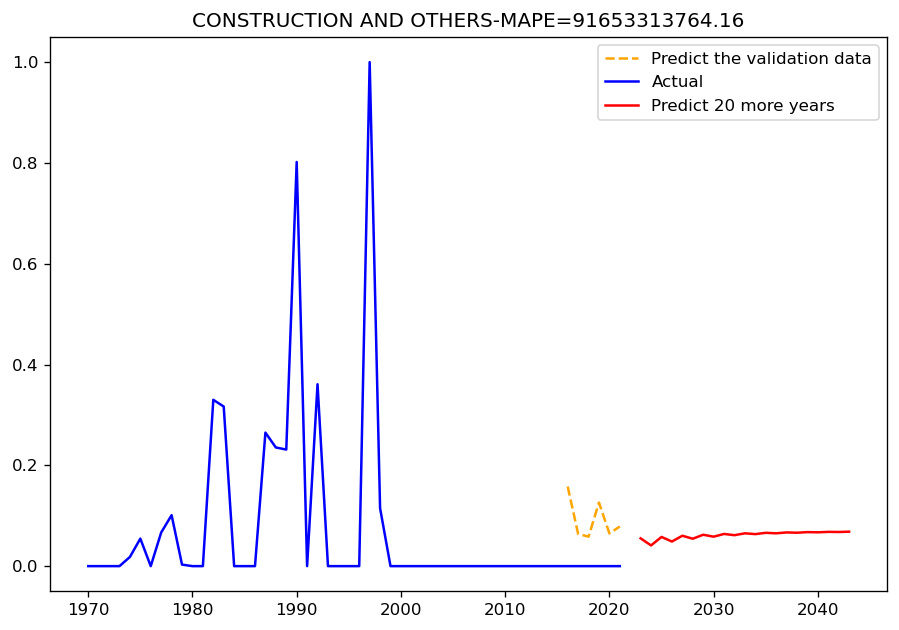

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



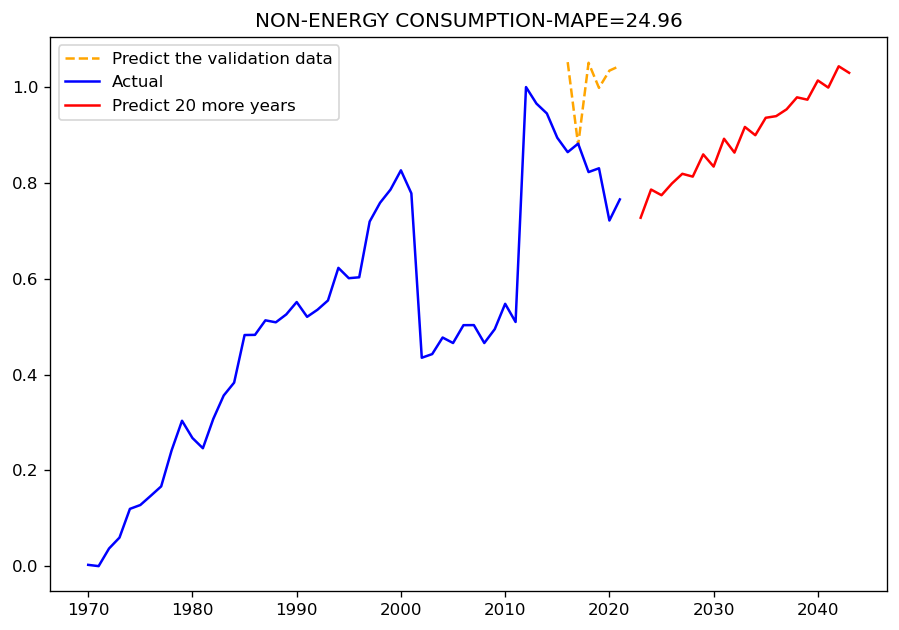

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



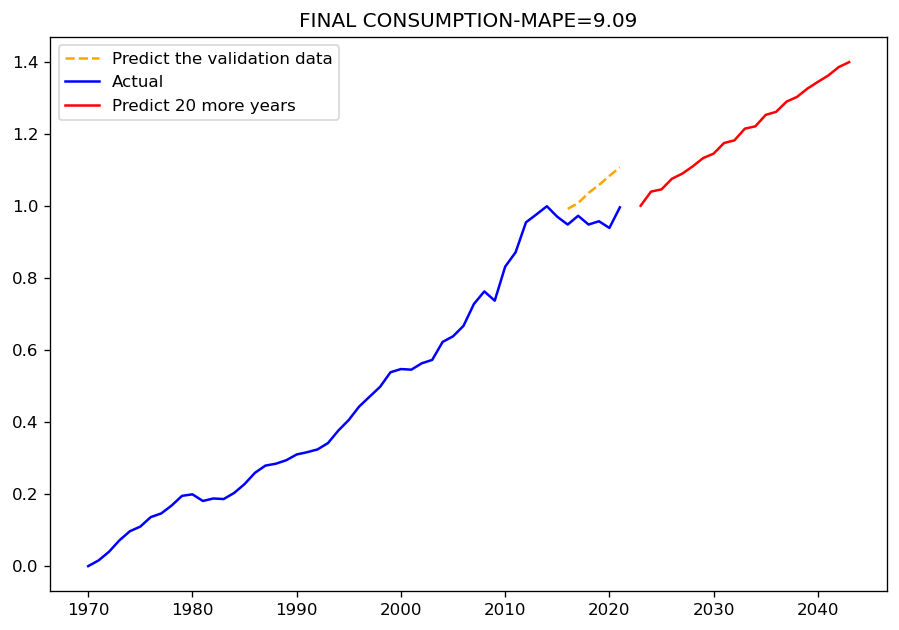

In [60]:

df_C_pred=pd.DataFrame()
for s in scaled_df.columns:
    
    # prepare data:
    # Separate size of data   
    train_size=int(len(scaled_df) * 0.9) 
    df_sector= scaled_df[[s]]
    df_sector.index = pd.to_datetime(df_sector.index, format='%Y')
    # Train and Validate
    df_tr=df_sector.iloc[:train_size]
    df_val=df_sector.iloc[train_size:]
       
    
    # Build model ARIMA with order=(1,1,1) or (2,1,1)
    ## We can select model here for each sector by including the condition....
    
    # Build model ARIMA with oder chose manually
    if s=='TRANSPORT':
        model_val=ARIMA(df_tr, order=(4,2,3))# or maybe (4,2,3)
        model = ARIMA(df_sector, order=(4,2,3))# or maybe (4,2,3)
    if s=='INDUSTRIAL':
        model_val = ARIMA(df_tr, order=(2,1,2))
        model = ARIMA(df_sector, order=(2,1,2))
    if s=='RESIDENTIAL':
        model_val = ARIMA(df_tr, order=(2,1,2)) # or maybe (3,1,2)
        model = ARIMA(df_sector, order=(2,1,2)) # or maybe (3,1,2)
    if s=='COMMERCIAL, SERVICES, PUBLIC':
        model_val = ARIMA(df_tr, order=(4,1,4))
        model = ARIMA(df_sector, order=(4,1,4))       
    if s=='AGRICULTURE, FISHING AND MINING':
        model_val = ARIMA(df_tr, order=(2,1,1))
        model = ARIMA(df_sector, order=(2,1,1))
    if s=='CONSTRUCTION AND OTHERS':
        model_val = ARIMA(df_tr, order=(2,0,2))
        model = ARIMA(df_sector, order=(2,0,2))
    if s=='NON-ENERGY CONSUMPTION':
        model_val = ARIMA(df_tr, order=(4,2,3))
        model = ARIMA(df_sector, order=(4,2,3))
    if s=='FINAL CONSUMPTION':
        model_val = ARIMA(df_tr, order=(3,2,3))
        model = ARIMA(df_sector, order=(3,2,3))
    
    model_val_fit=model_val.fit()
    model_fit = model.fit()
    
    
    # Validation:
    
    forecast_val = model_val_fit.predict(start=df_val.index[0], end=df_val.index[-1])

    # Create a Pandas DataFrame with the forecasted values and set the index
    df_forecast_val = pd.DataFrame(data=forecast_val, index=df_val.index)

    mape_val=MAPE(df_val, df_forecast_val)
    # Plot

    #plt.plot(df_sector, "b", label= "Actual")
    plt.plot(df_forecast_val, "orange", linestyle="--", label="Predict the validation data")
    

    #Predict:
    
    # Specify the number of future steps to forecast
    periods = 20  # Adjust as needed
    
    # Specify the start date
    start_date = pd.to_datetime('2022-01-01')

    # Prediction for future time points
    data_pred = model_fit.predict(start=start_date, end=start_date+ pd.DateOffset(years=periods))

    # Create a date range for the forecasted period
    forecast_index = pd.date_range(start=start_date, periods=periods+1, freq='A')

    # Create a Pandas DataFrame with the forecasted values and set the index
    df_forecast = pd.DataFrame(data=list(data_pred), index=forecast_index, columns=[s])

    # Plot
    plt.plot(df_sector, "b", label="Actual")
    plt.plot(df_forecast, "r", label="Predict 20 more years")

    #plt.title(f"{s}")
    plt.title(f'{s}-MAPE={mape_val}')
    plt.legend()
    plt.show()
    
    #Concatenate df
    df_C_pred=pd.concat([df_C_pred,df_forecast],axis=1)
# Round the values of each column in the dataframe with 2 decimals
df_C_pred = df_C_pred.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)  
df_C_pred.index=df_C_pred.index.year
# Save the df_forecast to excel
file_name='df_C_pred.xlsx'
df_C_pred.to_excel(file_name)

In [31]:
df_C_final=pd.concat([scaled_df, df_C_pred], axis=0)

In [32]:
df_C_final.index=df_C_final.index.astype(int)

# Invert the scaled values in your DataFrame back to the original data
df_C_final = pd.DataFrame(scaler.inverse_transform(df_C_final), columns=df_C_final.columns, index=df_C_final.index)
df_C_final=df_C_final.drop("FINAL CONSUMPTION", axis=1)


In [33]:
df_tot = df_C_final.sum(axis=1)
df_C_final['TOT']=df_tot

# Convert values to Mtoe
df_C_final=df_C_final/1000


<AxesSubplot:title={'center':'Prediction FINAL ENERGY CONSUMPTION 20 more years'}, xlabel='Year', ylabel='Values [Mtoe]'>

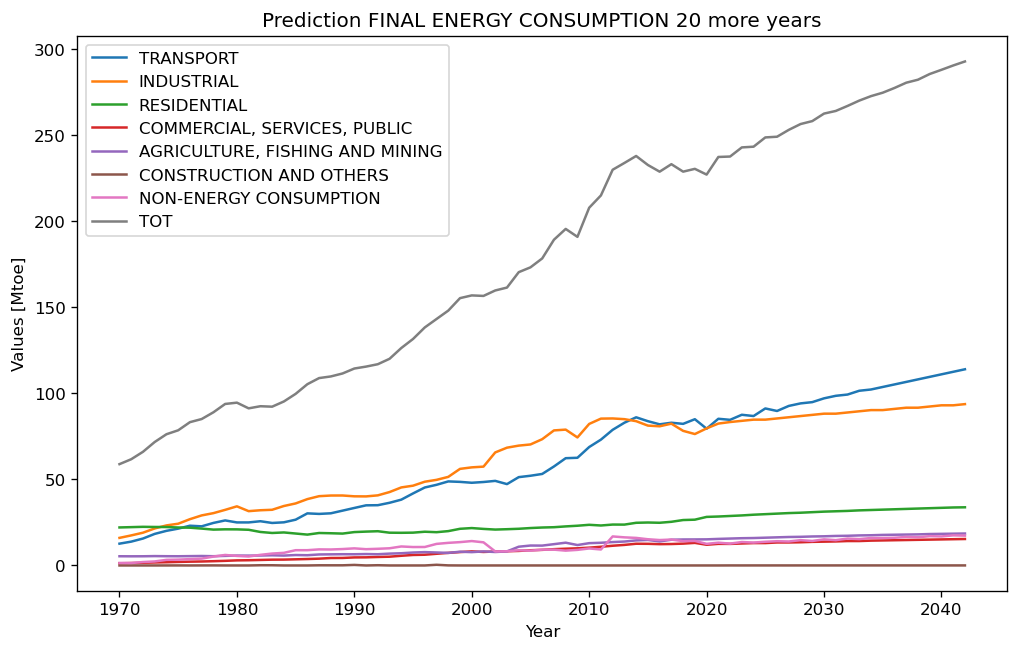

In [34]:
df_C_final.plot(figsize=(10, 6),title= "Prediction FINAL ENERGY CONSUMPTION 20 more years", xlabel= "Year", ylabel="Values [Mtoe]")

In [35]:
#val=df_C_final.loc[2025,'FINAL CONSUMPTION'].round(2)
#val

In [36]:
df_C_final=df_C_final.applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x) 

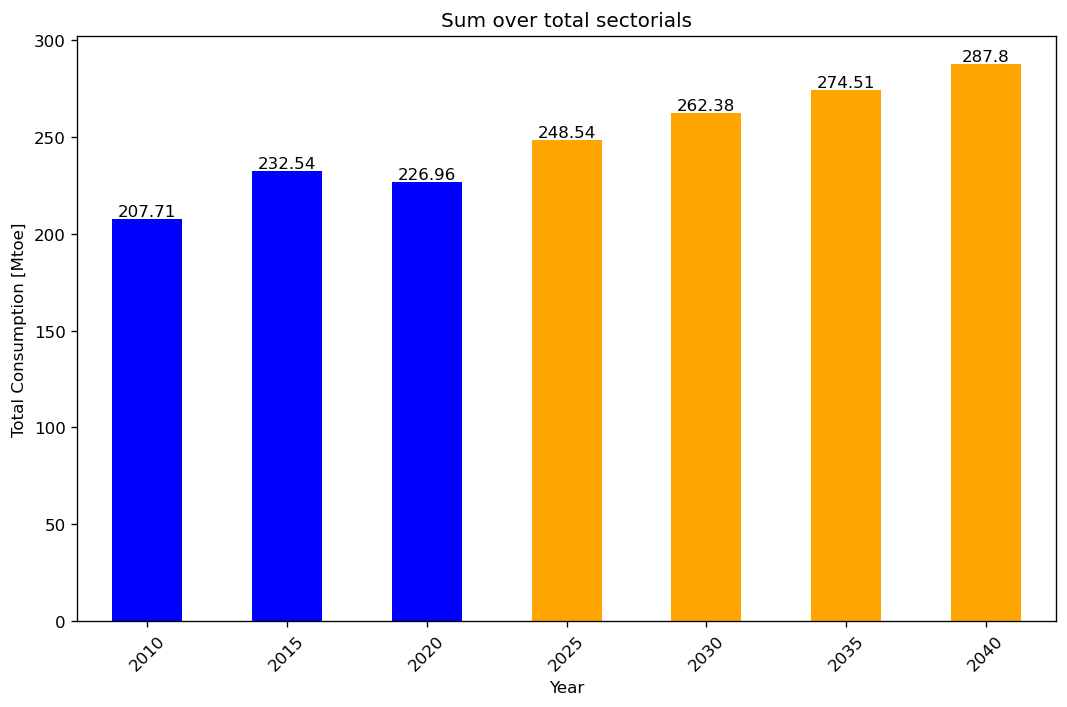

In [37]:
# Filter the DataFrame to include only data for every 5 years
filtered_df = df_C_final[df_C_final.index % 5 == 0]
# Create a bar plot
ax = filtered_df['TOT'][8:].plot(x='Year', y='TOT', kind='bar', color=['b']* (len(filtered_df)-(8+4))  + ['orange']*4 )

# Add value annotations to the bars
for index, value in enumerate(filtered_df['TOT'][8:]):
    ax.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Total Consumption [Mtoe]')
plt.title('Sum over total sectorials')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

 **Copare with the result in Website: eneroutlook**
 
 https://eneroutlook.enerdata.net/brazil-energy-forecast.html
 
 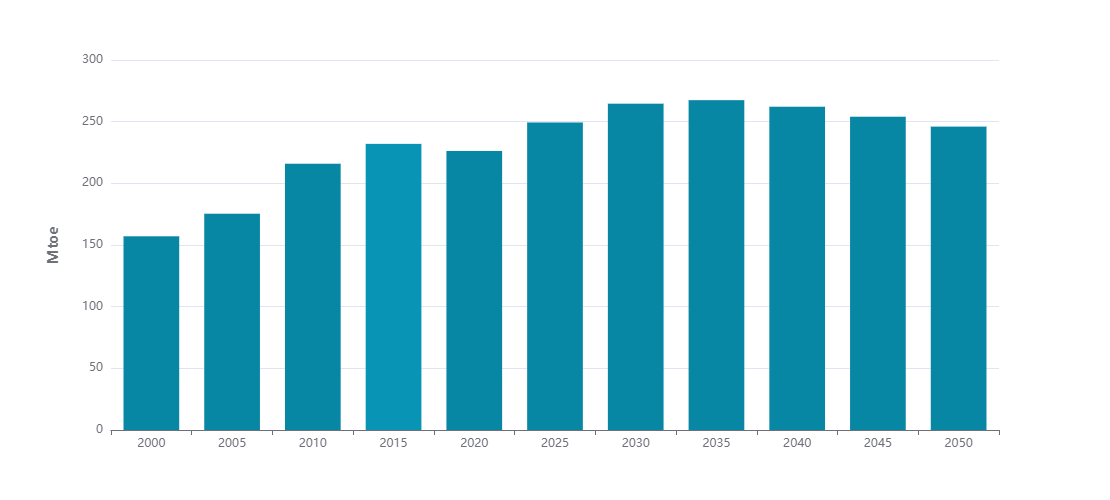
 

# Scenarios:

In [38]:
df_concat.head(3)

SECTOR       OIL  NATURAL GAS     COAL  HYDROENERGY  GEOTHERMAL  \
YEAR                                                                        
1970  PRODUCTION   8161.58      1102.24  1044.43      3421.52         NaN   
1970      IMPORT  17845.05          NaN  1358.47          NaN         NaN   
1970      EXPORT     65.05          NaN      NaN          NaN         NaN   

      NUCLEAR  FIREWOOD  SUGARCANE AND PRODUCTS  OTHER PRIMARY  ...  \
YEAR                                                            ...   
1970      NaN  31851.53                  3600.7         223.24  ...   
1970      NaN       NaN                     NaN            NaN  ...   
1970      NaN       NaN                     NaN            NaN  ...   

      KEROSENE/JET FUEL  DIESEL OIL  FUEL OIL   COKE  CHARCOAL   GASES  \
YEAR                                                                     
1970            1307.21     5674.61   8399.23  55.18   1766.75  465.95   
1970               8.19         NaN       NaN  72.42       NaN     NaN   
1970             122.91       47.15    748.34    NaN       NaN     NaN   

      OTHER SECONDARY  NON-ENERGY  TOTAL SECUNDARIES     TOTAL  
YEAR                                                            
1970           321.73      886.77           31068.07  49405.24  
1970              NaN      368.92             937.48  20141.01  
1970              NaN         NaN             920.12    985.17  

[3 rows x 24 columns]

In [39]:
df1=df_concat[df_concat.columns[1:11]]
df1['total1']=df1[df1.columns[:-1]].sum(axis=1)
df1_compare=df1[df1.columns[-2:]]
df1_compare

/var/folders/cr/7sx_pjr5131byrt21svnsg0w0000gn/T/ipykernel_35701/599399361.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TOTAL PRIMARIES    total1
YEAR                           
1970         49405.24  49405.24
1970         19203.53  19203.52
1970            65.05     65.05
1970          -444.85   -444.85
1970           922.22    922.22
...               ...       ...
2021          3557.08   3557.09
2021              NaN      0.00
2021         57940.62  57940.62
2021           215.94    215.94
2021         58156.56  58156.56

[1404 rows x 2 columns]

In [40]:
df2=df_concat[df_concat.columns[11:-1]]
df2['total2']=df2[df2.columns[:-1]].sum(axis=1)
df2_compare=df2[df2.columns[-2:]]
df2_compare



/var/folders/cr/7sx_pjr5131byrt21svnsg0w0000gn/T/ipykernel_35701/569299399.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TOTAL SECUNDARIES     total2
YEAR                              
1970           31068.07   31068.06
1970             937.48     937.48
1970             920.12     920.12
1970            -345.28    -345.27
1970             106.33     106.33
...                 ...        ...
2021           11864.60   11864.62
2021                NaN       0.00
2021          166016.93  166016.93
2021           13021.03   13021.03
2021          179037.96  179037.96

[1404 rows x 2 columns]

In [41]:
df_concat.SECTOR.unique()

array(['PRODUCTION', 'IMPORT', 'EXPORT', 'STOCK CHANGE', 'UNUSED',
       'TOTAL SUPPLY', 'REFINERIES', 'POWER PLANTS', 'SELF-PRODUCERS',
       'GAS PLANTS', 'CHARCOAL PLANTS', 'COKE PLANTS AND BLAST FURNACES',
       'DISTILLERIES', 'OTHER CENTERS', 'TOTAL TRANSFORMATION',
       'OWN CONSUMPTION', 'LOSSES', 'ADJUSTMENT', 'TRANSPORT',
       'INDUSTRIAL', 'RESIDENTIAL', 'COMMERCIAL, SERVICES, PUBLIC',
       'AGRICULTURE, FISHING AND MINING', 'CONSTRUCTION AND OTHERS',
       'ENERGY CONSUMPTION', 'NON-ENERGY CONSUMPTION',
       'FINAL CONSUMPTION'], dtype=object)

In [42]:
df_S=df_concat.copy()
selected_SECTORS_S=['PRODUCTION', 'IMPORT', 'EXPORT', 'STOCK CHANGE', 'UNUSED',
       'TOTAL SUPPLY']

df_S=df_S[df_S['SECTOR'].isin(selected_SECTORS_S)]
df_S = df_S.groupby(['YEAR','SECTOR'])['TOTAL'].sum().reset_index()
# Pivot the data
df_S = df_S.pivot(index='YEAR', columns='SECTOR', values='TOTAL')

# Reorder the columns in df
df_S = df_S[selected_SECTORS_S]

# Display the resultdf_summary
df_S.head()

SECTOR  PRODUCTION    IMPORT   EXPORT  STOCK CHANGE   UNUSED  TOTAL SUPPLY
YEAR                                                                      
1970      49405.24  20141.01   985.17       -790.13  1028.54      66742.40
1971      50178.10  23248.45  1269.02      -1348.83   716.67      70092.03
1972      51438.80  28276.61  2651.50      -1323.37   629.20      75111.33
1973      52148.96  37876.93  3533.30      -3735.93   793.22      81963.44
1974      54594.25  37908.01  3484.41       -908.39   481.25      87628.20

<AxesSubplot:xlabel='YEAR'>

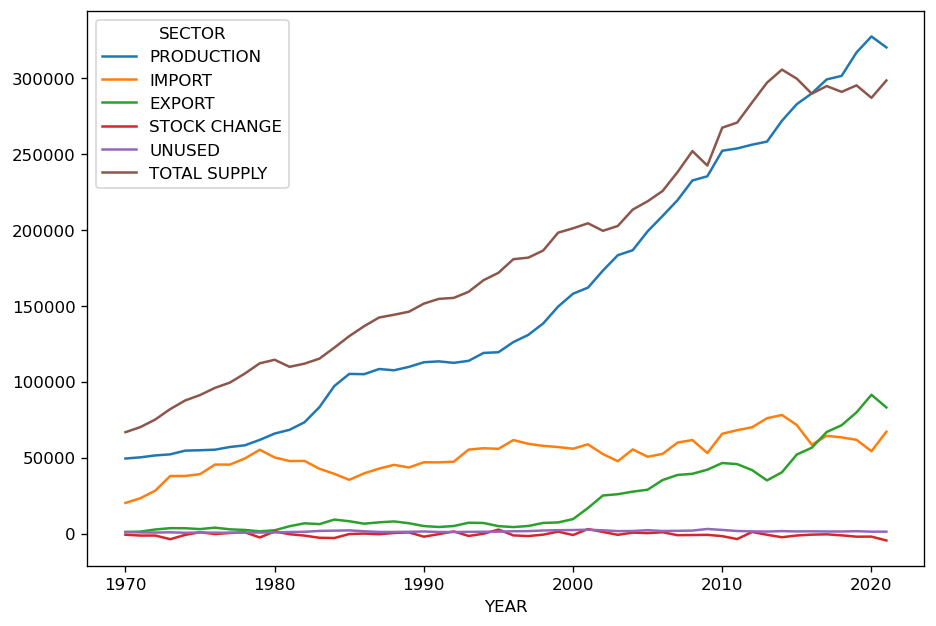

In [43]:
df_S.plot()

In [44]:
df_concat.columns


Index(['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL'],
      dtype='object')

In [45]:
final_consumption_data = df_concat[df_concat['SECTOR'] == 'FINAL CONSUMPTION']
final_consumption_data=final_consumption_data.drop(columns=['SECTOR'])
final_consumption_data.columns

Index(['OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL', 'NUCLEAR',
       'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL'],
      dtype='object')

In [46]:
df1=final_consumption_data[final_consumption_data.columns[1:10]]
df1['total1']=df1[df1.columns[:-1]].sum(axis=1)
df1_compare=df1[df1.columns[-2:]]
df1_compare.head()

/var/folders/cr/7sx_pjr5131byrt21svnsg0w0000gn/T/ipykernel_35701/3295789219.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TOTAL PRIMARIES    total1
YEAR                           
1970         31635.21  31635.22
1971         31374.67  31374.68
1972         31596.50  31596.51
1973         31403.26  31403.26
1974         31085.05  31085.05

In [47]:
df2=final_consumption_data[final_consumption_data.columns[10:-1]]
df2['total2']=df2[df2.columns[:-1]].sum(axis=1)
df2_compare=df2[df2.columns[-2:]]
df2_compare.head()


/var/folders/cr/7sx_pjr5131byrt21svnsg0w0000gn/T/ipykernel_35701/3468517166.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TOTAL SECUNDARIES    total2
YEAR                             
1970           27198.90  27198.90
1971           30317.01  30317.02
1972           34398.62  34398.62
1973           40289.60  40289.61
1974           45113.35  45113.36

In [48]:
final_consumption_data[['TOTAL PRIMARIES','TOTAL SECUNDARIES','TOTAL']]
final_consumption_data['total12']=final_consumption_data['TOTAL PRIMARIES']+final_consumption_data['TOTAL SECUNDARIES']
final_consumption_data[['total12','TOTAL']]

total12      TOTAL
YEAR                      
1970   58834.11   58834.12
1971   61691.68   61691.69
1972   65995.12   65995.12
1973   71692.86   71692.86
1974   76198.40   76198.40
1975   78491.85   78491.85
1976   83208.97   83208.97
1977   85026.51   85026.52
1978   88944.96   88944.97
1979   93782.09   93782.10
1980   94534.84   94534.85
1981   91232.82   91232.82
1982   92462.42   92462.42
1983   92200.73   92200.73
1984   95222.32   95222.32
1985   99634.72   99634.71
1986  105251.29  105251.29
1987  108807.69  108807.69
1988  109756.68  109756.68
1989  111486.58  111486.58
1990  114351.06  114351.06
1991  115475.10  115475.10
1992  116856.28  116856.28
1993  120002.68  120002.68
1994  126260.73  126260.73
1995  131516.33  131516.33
1996  138211.73  138211.73
1997  143104.84  143104.84
1998  147985.32  147985.31
1999  155221.98  155221.98
2000  156808.59  156808.59
2001  156515.30  156515.30
2002  159678.14  159678.14
2003  161359.71  161359.72
2004  170298.70  170298.70
2005  173105.86  173105.86
2006  178276.74  178276.74
2007  189140.88  189140.88
2008  195412.94  195412.94
2009  190814.83  190814.83
2010  207712.49  207712.48
2011  214859.53  214859.53
2012  229774.08  229774.08
2013  233713.24  233713.25
2014  237763.13  237763.12
2015  232537.06  232537.06
2016  228653.04  228653.04
2017  233004.63  233004.63
2018  228665.38  228665.38
2019  230298.05  230298.05
2020  226959.77  226959.77
2021  237194.52  237194.52

In [49]:
final_consumption_data.columns

Index(['OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL', 'NUCLEAR',
       'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL',
       'total12'],
      dtype='object')

In [50]:
final_consumption_data.head()

OIL  NATURAL GAS   COAL  HYDROENERGY  GEOTHERMAL  NUCLEAR  FIREWOOD  \
YEAR                                                                        
1970  NaN         6.32  82.24          NaN         NaN      NaN  28344.98   
1971  NaN        30.79  87.07          NaN         NaN      NaN  27814.78   
1972  NaN        68.11  88.10          NaN         NaN      NaN  27516.68   
1973  NaN        93.30  70.18          NaN         NaN      NaN  26987.72   
1974  NaN       227.64  99.30          NaN         NaN      NaN  26479.21   

      SUGARCANE AND PRODUCTS  OTHER PRIMARY  TOTAL PRIMARIES  ...  DIESEL OIL  \
YEAR                                                          ...               
1970                 3059.59         142.09         31635.21  ...     5336.83   
1971                 3289.09         152.95         31374.67  ...     5914.66   
1972                 3716.35         207.27         31596.50  ...     6768.56   
1973                 4029.93         222.13         31403.26  ...     8026.25   
1974                 4025.03         253.87         31085.05  ...     8899.86   

      FUEL OIL   COKE  CHARCOAL   GASES  OTHER SECONDARY  NON-ENERGY  \
YEAR                                                                   
1970   5714.24    NaN   1589.82  296.06           105.19     1201.77   
1971   6805.91    NaN   1810.66  308.70           124.87     1173.62   
1972   7441.03    NaN   2098.66  325.40           139.42     1238.57   
1973   9180.71  19.31   2227.16  355.91           154.82     1238.57   
1974  10540.23  20.69   2777.33  362.27           160.69     2002.12   

      TOTAL SECUNDARIES     TOTAL   total12  
YEAR                                         
1970           27198.90  58834.12  58834.11  
1971           30317.01  61691.69  61691.68  
1972           34398.62  65995.12  65995.12  
1973           40289.60  71692.86  71692.86  
1974           45113.35  76198.40  76198.40  

[5 rows x 24 columns]

In [51]:
# Clasify the energy sources:

group_CARBON=['COAL','FIREWOOD','COKE','CHARCOAL']

group_PETROLIUM= ['OIL','GASOLINE/ALCOHOL','KEROSENE/JET FUEL','DIESEL OIL','FUEL OIL']

group_NATURAL_GAS=['NATURAL GAS','LPG','GASES']

group_RENEWABLE=['HYDROENERGY','GEOTHERMAL','SUGARCANE AND PRODUCTS']

group_ELECTRICITY= ['ELECTRICITY']

group_NUCLEAR=['NUCLEAR']

group_OTHER=['OTHER PRIMARY','OTHER SECONDARY','NON-ENERGY']

In [52]:
df_group['CARBON']=final_consumption_data[[group_CARBON]]

KeyError: "None of [Index([('COAL', 'FIREWOOD', 'COKE', 'CHARCOAL')], dtype='object')] are in the [columns]"

In [ ]:
df_group=pd.DataFrame()

df_group['CARBON']=final_consumption_data[group_CARBON]#.sum(axis=1)
df_group['PETROLIUM']=final_consumption_data[group_PETROLIUM].sum(axis=1)
df_group['NATURAL_GAS']=final_consumption_data[group_NATURAL_GAS].sum(axis=1)
df_group['ELECTRICITY']=final_consumption_data[group_ELECTRICITY]
df_group['RENEWABLE']=final_consumption_data[group_RENEWABLE].sum(axis=1)
df_group['NUCLEAR']=final_consumption_data['NUCLEAR']
df_group['OTHER']=final_consumption_data[group_OTHER].sum(axis=1)

In [ ]:
df_group.plot()

In [ ]:
df_group_percentages = df_group.div(df_group.sum(axis=1) ,axis=0) * 100
df_group_percentages = df_group_percentages.round(0)

In [ ]:
df_group['tot']=df_group.sum(axis=1)
df_group['TOTAL']=final_consumption_data[['TOTAL']]
df_group